# InfoTechs Term Project
## Bekircan Kirkici, Fall 2019
### Comparison of 4 Different Income Levels: Health and Poverty Indicators


# 1. Initialization
Let's get all the required packages loaded.

Keep in mind that I will use a custom packege called "world_bank_data". The pip installation guide as well as the website for the package is given in the comments.

## 1.1 Packages

In [1]:
#setup the required packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-whitegrid') # I like to use this style

import random as rd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics #use for SLM later 

#to get data from worldbank we use this package.
#documentation can be found at https://pypi.org/project/world-bank-data/
#Installed using "pip install world_bank_data --upgrade"
import world_bank_data as wb
import sys

## 1.2 WB Basics & My Source

In [2]:
# Here we will get 21 different topic that is in WorldBank database. 
# I want to focus on 2 different topics; Health and Poverty -> 8 and 11
wb.get_topics() #remove ; to get all topics

,value,sourceNote
id,,
1,Agriculture & Rural Development,For the 70 percent of the world's poor who liv...
2,Aid Effectiveness,Aid effectiveness is the impact that aid has i...
3,Economy & Growth,Economic growth is central to economic develop...
4,Education,Education is one of the most powerful instrume...
5,Energy & Mining,The world economy needs ever-increasing amount...
6,Environment,Natural and man-made environmental resources –...
7,Financial Sector,An economy's financial markets are critical to...
8,Health,Improving health is central to the Millennium ...
9,Infrastructure,Infrastructure helps determine the success of ...


In [3]:
# We can use get_sources to get where the data is originated from; I want to get my data from World Development Indicators and
#Poverty and Equity -> 2 and 24
# https://datacatalog.worldbank.org/dataset/world-development-indicators
# http://povertydata.worldbank.org/poverty/home/
wb.get_sources() #remove ; to get all sources

,lastupdated,name,code,description,url,dataavailability,metadataavailability,concepts
id,,,,,,,,
1,2019-10-23,Doing Business,DBS,,,Y,Y,3
2,2019-10-28,World Development Indicators,WDI,,,Y,Y,3
3,2019-11-07,Worldwide Governance Indicators,WGI,,,Y,Y,3
5,2016-03-21,Subnational Malnutrition Database,SNM,,,Y,Y,3
6,2019-12-02,International Debt Statistics,IDS,,,Y,Y,3
11,2013-02-22,Africa Development Indicators,ADI,,,Y,Y,3
12,2019-11-21,Education Statistics,EDS,,,Y,Y,3
13,2017-01-03,Enterprise Surveys,ESY,,,Y,Y,3
14,2019-10-29,Gender Statistics,GDS,,,Y,Y,3


# 2. Indicators for Exploration

In [4]:
health = wb.get_indicators(topic=8, source=2)
h_list = list(health.name)
h_list;  

poverty = wb.get_indicators(topic=11, source=24)
p_list = list(poverty.name)
p_list; #remove ; to get all health indicators

#we access all the health and poverty data that is available from WDI. 
#we will conduct a visual inspection for interesting elements

## 2.1 Health Indicators

Now that I have a list for health and poverty indicators; I choose 4 different topics to look for in health; smoking prevalence, general alcohol consumption, child/infant mortality and general population demographics. 

I will get their index names so that I can run a loop to get all of them at once.

### 2.1.1 Smoking
I ll look at the smoking prevelence. 

In [5]:
smo_1 = h_list.index('Smoking prevalence, total (ages 15+)')
smo_2 = h_list.index('Smoking prevalence, females (% of adults)')
smo_3 = h_list.index('Smoking prevalence, males (% of adults)')
smoking_indices = health.index[[smo_1, smo_2, smo_3]]
smoking_indices;

### 2.1.2 Alcohol Consumption
Alcohol is one of the legal "drugs" in this age. While it is in center of all modern parties, the overuse/addiction creates problem. My aim is not to say claim alcohol and domestic abuse have a causation, but to show, if any, similarities in the patterns.

In [6]:
alc_cons_1 = h_list.index('Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)')
alc_cons_2 = h_list.index( 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)')
alc_cons_3 = h_list.index('Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)')
alc_cons_indices = health.index[[alc_cons_1, alc_cons_2, alc_cons_3]]
alc_cons_indices;

### 2.1.3 Mortality Rates
While we can look at a lot of mortality issues/causes, I choose to look at 4 things; under-5 deaths, skilled staff for births and out-of-pocket expenditure for health. Again, I do not claim any of them are cause of any other, but I want to look at some patterns, if any.

In [7]:
cm_1 = h_list.index("Mortality rate, under-5, female (per 1,000 live births)")
cm_2 = h_list.index("Mortality rate, under-5, male (per 1,000 live births)")
cm_3 = h_list.index('Births attended by skilled health staff (% of total)')
cm_4 = h_list.index('Out-of-pocket expenditure (% of current health expenditure)')
cm_5 = h_list.index('Mortality rate, infant (per 1,000 live births)')
cm_indices = health.index[[cm_1, cm_2, cm_3, cm_4, cm_5]]
cm_indices;

## 2.2 Poverty Indicators
We will look at the most basic poverty indicators.

### 2.2.1 Income Distribution
Income distribution among the 5 quantiles is always important in a poverty/wealth conversation. GINI is the product of that distribution. 

For more information on GINI -> "https://www.investopedia.com/terms/g/gini-index.asp"

In [8]:
pov_1 = p_list.index('Income share held by lowest 20%')
pov_2 = p_list.index('Income share held by second 20%')
pov_3 = p_list.index('Income share held by third 20%')
pov_4 = p_list.index('Income share held by fourth 20%')
pov_5 = p_list.index('Income share held by highest 20%')
gini_co = p_list.index('GINI index (World Bank estimate)')
pov_indices = poverty.index[[pov_1, pov_2, pov_3, pov_4, pov_5, gini_co]]
pov_indices;

### 2.2.2 Poverty Line
Another thing to consider the poverty gap at different daily wages.

In [9]:
gap_1 = p_list.index('Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)')
gap_2 = p_list.index('Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)')
gap_3 = p_list.index('Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)')
gap_indices = poverty.index[[gap_1, gap_2, gap_3]]
gap_indices;

## 2.3 Population Demographic
While pop demographic is not related to health, this would provide us with some insight. Thus, I want to see the age distribution of all the male and female population within the country.

In [10]:
f1 = h_list.index('Population ages 00-04, female (% of female population)')
m1 = h_list.index('Population ages 00-04, male (% of male population)')
f2 = h_list.index('Population ages 05-09, female (% of female population)')
m2 = h_list.index('Population ages 05-09, male (% of male population)')
f3 = h_list.index('Population ages 10-14, female (% of female population)')
m3 = h_list.index('Population ages 10-14, male (% of male population)')
f4 = h_list.index('Population ages 15-19, female (% of female population)')
m4 = h_list.index('Population ages 15-19, male (% of male population)')
f5 = h_list.index('Population ages 20-24, female (% of female population)')
m5 = h_list.index('Population ages 20-24, male (% of male population)')
f6 = h_list.index('Population ages 25-29, female (% of female population)')
m6 = h_list.index('Population ages 25-29, male (% of male population)')
f7 = h_list.index('Population ages 30-34, female (% of female population)')
m7 = h_list.index('Population ages 30-34, male (% of male population)')
f8 = h_list.index('Population ages 35-39, female (% of female population)')
m8 = h_list.index('Population ages 35-39, male (% of male population)')
f9 = h_list.index('Population ages 40-44, female (% of female population)')
m9 = h_list.index('Population ages 40-44, male (% of male population)')
f10 = h_list.index('Population ages 45-49, female (% of female population)')
m10 = h_list.index('Population ages 45-49, male (% of male population)')
f11 = h_list.index('Population ages 50-54, female (% of female population)')
m11 = h_list.index('Population ages 50-54, male (% of male population)')
f12 = h_list.index('Population ages 55-59, female (% of female population)')
m12 = h_list.index('Population ages 55-59, male (% of male population)')
f13 = h_list.index('Population ages 60-64, female (% of female population)')
m13 = h_list.index('Population ages 60-64, male (% of male population)')
f14 = h_list.index('Population ages 65 and above, female (% of female population)')
m14 = h_list.index('Population ages 65 and above, male (% of male population)')
pop_tot = h_list.index('Population, total')
pop_growth = h_list.index('Population growth (annual %)')
pop_indices = health.index[[f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, \
                            m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12, m13, m14, \
                            pop_tot, pop_growth]]
pop_indices;

# 3. Gathering and Preprocessing Data
Now that I have all the indices, I will run a loop to get all the data from WB.

In [11]:
#wb.get_countries() gives me all the countries and aggregates regions 
#we want to use only countries so I need to filter out 'aggregate group'.
allcountries = wb.get_countries()
non_aggregates = allcountries[allcountries['incomeLevel']!='Aggregates'][['name', 'incomeLevel']]

high_inc = non_aggregates[non_aggregates['incomeLevel']=='High income']
low_inc = non_aggregates[non_aggregates['incomeLevel']=='Low income']
low_mid_inc = non_aggregates[non_aggregates['incomeLevel']=='Lower middle income']
upp_mid_inc = non_aggregates[non_aggregates['incomeLevel']=='Upper middle income']
#We now classified all the countries names with respect to their income level.

print('There are {} high income countries, {} upper middle income countries, {} lower middle income countries and {} low income countries'.format(len(high_inc.index), len(upp_mid_inc.index), len(low_mid_inc.index), len(low_inc.index)))

There are 80 high income countries, 60 upper middle income countries, 47 lower middle income countries and 31 low income countries


## 3.1 Choosen countries
I choose to work with these ones below. 5 countries from each income level. Decision is purely on my side, but one can replace the country codes with new ones (up to their limits printed above) and work with those later by slightly changing some variables. 

In [12]:
hi_c = ['USA', 'SWE', 'AUT', 'FRA', 'CHE']
li_c = ['AFG', 'SOM', 'ETH', 'HTI', 'CAF']
lmi_c = ['VNM', 'MDA', 'SEN', 'BGD', 'EGY']
umi_c = ['TUR', 'RUS', 'MEX', 'COL', 'CHN']

chc_list = []
for i in list([hi_c, umi_c, lmi_c, li_c]):
    for j in i:
        chc_list.append(j)
        
chc_list;

['USA',
 'SWE',
 'AUT',
 'FRA',
 'CHE',
 'TUR',
 'RUS',
 'MEX',
 'COL',
 'CHN',
 'VNM',
 'MDA',
 'SEN',
 'BGD',
 'EGY',
 'AFG',
 'SOM',
 'ETH',
 'HTI',
 'CAF']

In [13]:
upper = [high_inc.loc[hi_c[i]]['name'] for i in range(len(hi_c))]
midupper = [upp_mid_inc.loc[umi_c[i]]['name'] for i in range(len(umi_c))]
midlower = [low_mid_inc.loc[lmi_c[i]]['name'] for i in range(len(lmi_c))]
lower = [low_inc.loc[li_c[i]]['name'] for i in range(len(li_c))]
countries = []
for n in list([upper, midupper, midlower, lower]):
    for m in n:
        countries.append(m)
        
countries #put all country names in a list, we will use this later.

['United States',
 'Sweden',
 'Austria',
 'France',
 'Switzerland',
 'Turkey',
 'Russian Federation',
 'Mexico',
 'Colombia',
 'China',
 'Vietnam',
 'Moldova',
 'Senegal',
 'Bangladesh',
 'Egypt, Arab Rep.',
 'Afghanistan',
 'Somalia',
 'Ethiopia',
 'Haiti',
 'Central African Republic']

## 3.2 All Indices
Now that we have countries and all the choosen indices, we need to pile them all into a list, instead of list of lists. The reason is that I will iterate through them and access the WB data

In [14]:
all_indices = [] 
for i in list([smoking_indices, alc_cons_indices, cm_indices, pop_indices, pov_indices, gap_indices]):
    for j in i:
        all_indices.append(j)
        
all_indices;

## 3.3 Creating the DataFrame & Tidying
This cell gathers all the wanted data from World Bank, thus, might take a little longer than previous cells. 

Below that, we will edit the column names, put the column names in lists and create a list for countries.

In [15]:
asd = [None] * len(all_indices) #setup an empty list to store all DFs

for n in range(len(all_indices)):
    asd[n] = wb.get_series(all_indices[n], country=chc_list, mrv=5, id_or_value='value', simplify_index=True).to_frame()

new_df = pd.concat(asd, axis=1)
new_df.columns #get all the column names

### 3.3.1 Data columns to list
We put all the names to lists so we can call them easier.


In [16]:
#change column names so we can analyze it easier
cols = [h_list[smo_1], h_list[smo_2], h_list[smo_3], \
 h_list[alc_cons_1],h_list[alc_cons_2],h_list[alc_cons_3], \
 h_list[cm_1], h_list[cm_2], h_list[cm_3], h_list[cm_4], h_list[cm_5], \
 h_list[f1], h_list[f2], h_list[f3], h_list[f4], h_list[f5], h_list[f6], h_list[f7], \
 h_list[f8], h_list[f9], h_list[f10], h_list[f11], h_list[f12], h_list[f13], h_list[f14], \
 h_list[m1], h_list[m2], h_list[m3], h_list[m4], h_list[m5], h_list[m6], h_list[m7], \
 h_list[m8], h_list[m9], h_list[m10], h_list[m11], h_list[m12], h_list[m13], h_list[m14], \
 h_list[pop_tot], h_list[pop_growth], \
 p_list[pov_1], p_list[pov_2], p_list[pov_3], p_list[pov_4], p_list[pov_5], \
 p_list[gini_co], \
 p_list[gap_1], p_list[gap_2], p_list[gap_3]]
new_df.columns = cols
new_df.columns #get all the new column names

### 3.3.2 Indicators' list
Create different lists for easy access in the DF

In [17]:
smoking = [new_df.columns[0], new_df.columns[1], new_df.columns[2]]
alcohol = [new_df.columns[3], new_df.columns[4], new_df.columns[5]]
child = [new_df.columns[6], new_df.columns[7], new_df.columns[8], new_df.columns[9], new_df.columns[10]]
pop_age_female = [new_df.columns[11], new_df.columns[12], new_df.columns[13], new_df.columns[14], new_df.columns[15], new_df.columns[16], new_df.columns[17], \
                  new_df.columns[18], new_df.columns[19], new_df.columns[20], new_df.columns[21], new_df.columns[22], new_df.columns[23], new_df.columns[24]]
pop_age_male = [new_df.columns[25], new_df.columns[26], new_df.columns[27], new_df.columns[28], new_df.columns[29], new_df.columns[30], new_df.columns[31], \
                  new_df.columns[32], new_df.columns[33], new_df.columns[34], new_df.columns[35], new_df.columns[36], new_df.columns[37], new_df.columns[38]]
pop_general = [new_df.columns[39], new_df.columns[40]]
poverty_quantile = [new_df.columns[41], new_df.columns[42], new_df.columns[43], new_df.columns[44], new_df.columns[45]]
gini = [new_df.columns[46]]
poverty_lines = [new_df.columns[47], new_df.columns[48], new_df.columns[49]]
pop_age_male;

# 4. Exploring and Plotting
Below I will try to provide some visuals for some aspects. 

More detailed, than comments, explanations can be found in the project report.


## 4.1 General Information about Countries
Let's get some general population information about all the countries.

In [18]:
all_general = [None] * len(countries)
#get population, population growth, GINI
for i in range(len(all_general)):
    all_general[i] = new_df.loc[countries[i]][[pop_general[0], pop_general[1], gini[0]]]
    
all_general;

### 4.1.1 Total Population Distribution

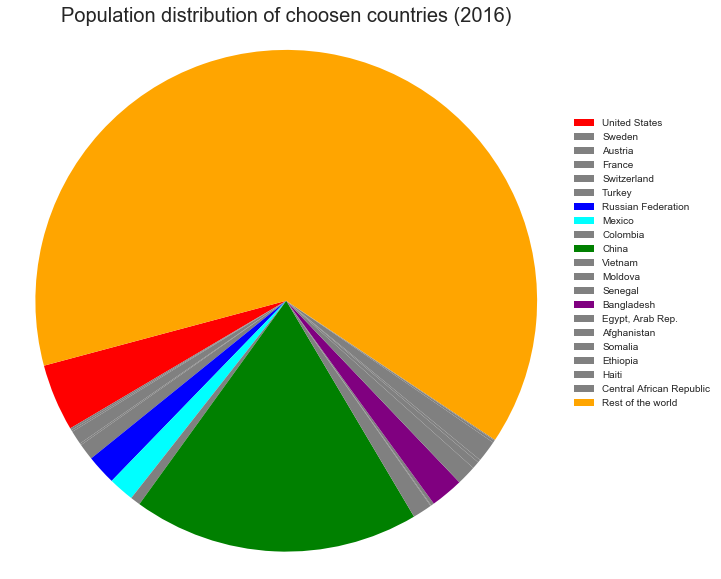

In [19]:
pie_chart_list = [None] * (len(countries)+1)

for i in range(len(countries)):
    pie_chart_list[i] = all_general[i]['Population, total'].iloc[7] #2016
    
pie_chart_list[20] = 7464022049 - sum(pie_chart_list[0:19])

#setup 20 different markers for marking
markers = ['','.', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'h', 'D', 'X', '*', '+', 4, 5]  

labels = countries + ['Rest of the world']
sizes = pie_chart_list
explode = (0, 0.025, 0.05, 0.075, 0.1, 0.025, 0.05, 0.075, 0.1, 0.025, 0.05, 0.075, 0.1, 0.025, 0.05, 0.075, 0.1, 0.025, 0.05, 0.075, 0.1)
colors2 = ['Red', 'Gray', 'Gray', 'Gray', 'Gray', \
           'Gray', 'Blue', 'Cyan', 'Gray', 'Green', \
           'Gray', 'Gray', 'Gray', 'Purple', 'Gray', \
           'Gray', 'Gray', 'Gray', 'Gray', 'Gray', 'Orange']
colors_not_gray = ['#FF0000', '#FFFF00', '#00EAFF', '#AA00FF', '#BFFF00', \
                  '#0095FF', '#FF00AA', '#FFD400', '#6AFF00', '#0040FF', \
                  '#EDB9B9', '#B9D7ED', '#E7E9B9', '#DCB9ED', '#B9EDE0', \
                  '#8F2323', '#23628F', '#8F6A23', '#6B238F', '#737373', \
                  'Orange']
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, startangle=195, colors=colors2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Population distribution of choosen countries (2016)", fontsize=20)
ax1.legend(labels=labels, bbox_to_anchor=(1, 0, 0.01, 0.85))

plt.savefig('pop_distribution.pdf', bbox_inches='tight'), 
plt.savefig('pop_distribution.png', bbox_inches='tight'),
plt.show()

In [20]:
print('Our 20 countries cover the {:.2%} of the whole world population!'.format(sum(pie_chart_list[0:19])/ 7464022049))

Our 20 countries cover the 36.44% of the whole world population!


### 4.1.2 Population Growth 

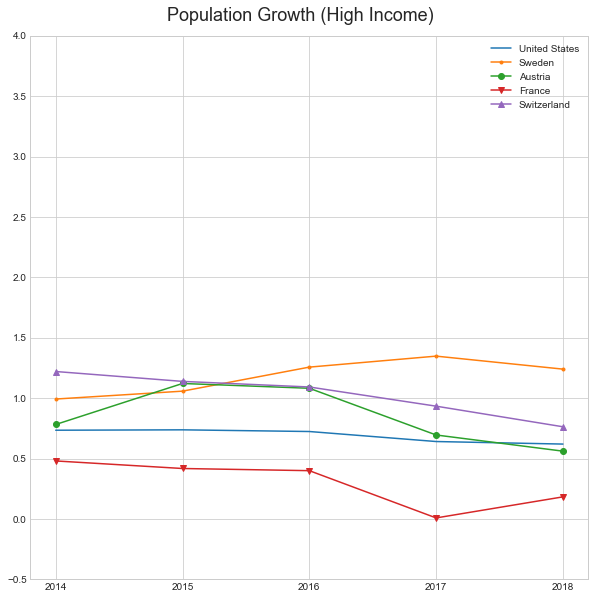

In [21]:
plt.figure(figsize=(10,10)) 

for i in range(len(countries)-15):
    plt.plot(pop_general[1], data = all_general[i], label=countries[i], marker=markers[i])
plt.legend(loc=0)
plt.suptitle("Population Growth (High Income)", fontsize=18, x=0.5, y=0.92)
plt.ylim(-0.5,4)

plt.savefig('pop_growth_high_income.pdf'), 
#plt.savefig('pop_growth_high_income.png'), 
plt.show();

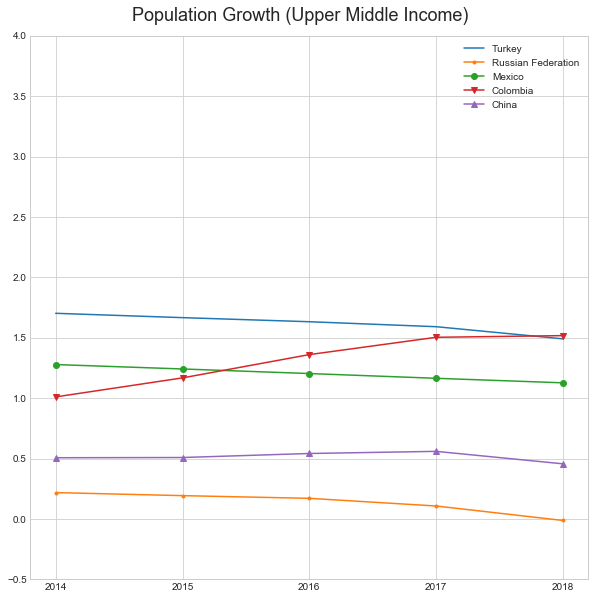

In [22]:
plt.figure(figsize=(10,10)) 
for i in range(len(countries)-15):
    plt.plot(pop_general[1], data = all_general[i+5], label=countries[i+5], marker=markers[i])
plt.legend(loc=0)
plt.suptitle("Population Growth (Upper Middle Income)", fontsize=18, x=0.5, y=0.92)
plt.ylim(-0.5,4)

plt.savefig('pop_growth_upper_middle_income.pdf'),
#plt.savefig('pop_growth_upper_middle_income.png'), 
plt.show();

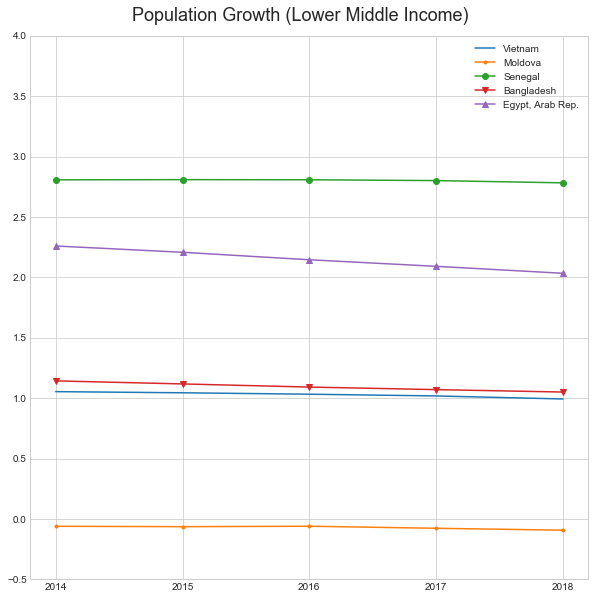

In [23]:
plt.figure(figsize=(10,10)) 
for i in range(len(countries)-15):
    plt.plot(pop_general[1], data = all_general[i+10], label=countries[i+10], marker=markers[i])
plt.legend(loc=0)
plt.suptitle("Population Growth (Lower Middle Income)", fontsize=18, x=0.5, y=0.92)
plt.ylim(-0.5,4)

plt.savefig('pop_growth_lower_middle_income.pdf'), 
#plt.savefig('pop_growth_lower_middle_income.png'), 
plt.show();

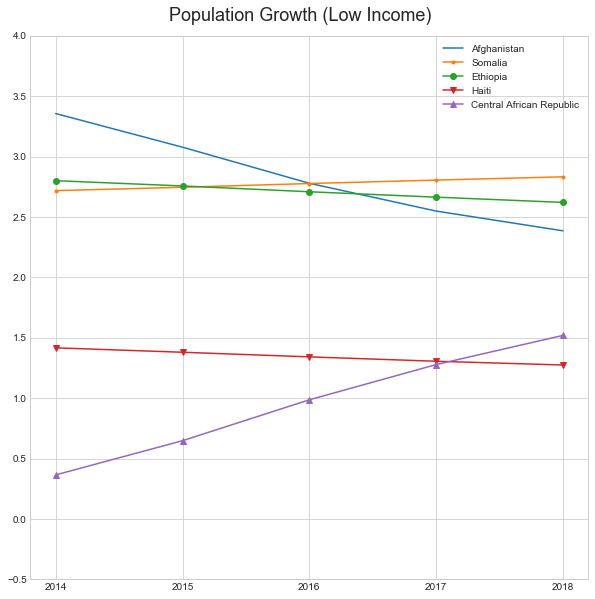

In [24]:
plt.figure(figsize=(10,10)) 
for i in range(len(countries)-15):
    plt.plot(pop_general[1], data = all_general[i+15], label=countries[i+15], marker=markers[i])
plt.legend(loc=0)
plt.suptitle("Population Growth (Low Income)", fontsize=18, x=0.5, y=0.92)
plt.ylim(-0.5,4)

plt.savefig('pop_growth_low_income.pdf'), 
#plt.savefig('pop_growth_low_income.png'), 
plt.show();

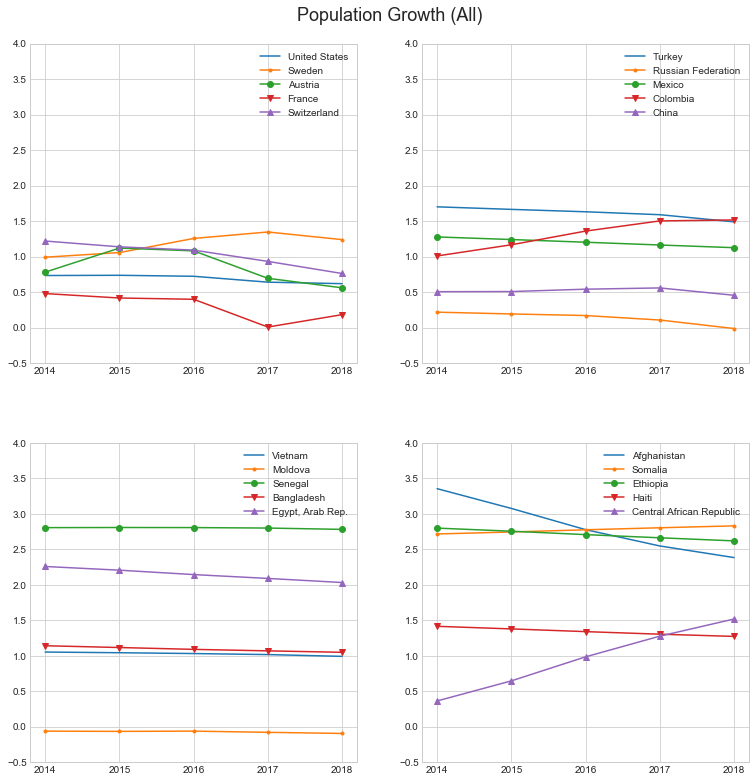

In [25]:
plt.figure(figsize=(10,10)) 

plt.subplot(221)
for i in range(len(countries)-15):
    plt.plot(pop_general[1], data = all_general[i], label=countries[i], marker=markers[i])
plt.legend(loc=0)

plt.ylim(-0.5,4)

plt.subplot(222)
for i in range(len(countries)-15):
    plt.plot(pop_general[1], data = all_general[i+5], label=countries[i+5], marker=markers[i])
plt.legend(loc=0)

plt.ylim(-0.5,4)

plt.subplot(223)
for i in range(len(countries)-15):
    plt.plot(pop_general[1], data = all_general[i+10], label=countries[i+10], marker=markers[i])
plt.legend(loc=0)

plt.ylim(-0.5,4)

plt.subplot(224)
for i in range(len(countries)-15):
    plt.plot(pop_general[1], data = all_general[i+15], label=countries[i+15], marker=markers[i])
plt.legend(loc=0)

plt.ylim(-0.5,4)

plt.suptitle("Population Growth (All)", fontsize=18, x=0.5, y=1.05)

plt.subplots_adjust(top=0.999, bottom=0.001, left=.001, right=0.999, hspace=0.25,
                    wspace=0.2)

plt.savefig('pop_growth_all.pdf', bbox_inches='tight'), 
#plt.savefig('pop_growth_all.pdf', bbox_inches='tight'),  
plt.show();

### 4.1.3 Population Pyramids

In [26]:
age_demo = [None] * len(countries)

#for age dist histogram
for i in range(len(age_demo)):
    age_demo[i] = new_df.loc[countries[i],'2016'][[pop_age_male[0], pop_age_male[1], pop_age_male[2], pop_age_male[3], \
                                                        pop_age_male[4], pop_age_male[5], pop_age_male[6], \
                                                        pop_age_male[7], pop_age_male[8], pop_age_male[9], pop_age_male[10], \
                                                        pop_age_male[11], pop_age_male[12], pop_age_male[13], 
                                                        pop_age_female[0], pop_age_female[1], pop_age_female[2], \
                                                        pop_age_female[3], pop_age_female[4], pop_age_female[5], \
                                                        pop_age_female[6], pop_age_female[7], pop_age_female[8], \
                                                        pop_age_female[9], pop_age_female[10], \
                                                        pop_age_female[11], pop_age_female[12], pop_age_female[13]]] 
    
for i in range(len(age_demo)):
    for j in range(14):
        age_demo[i][j+14] = -1 * age_demo[i][j+14]

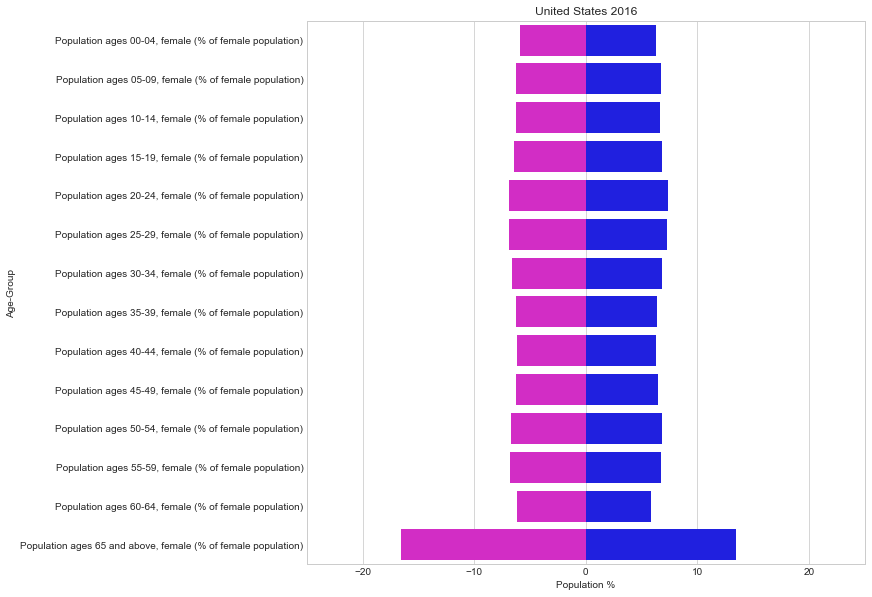

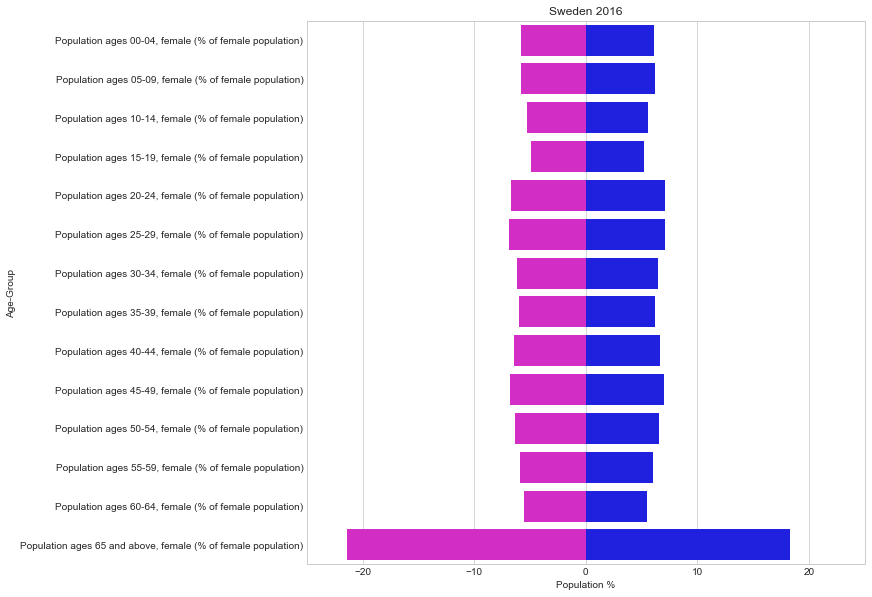

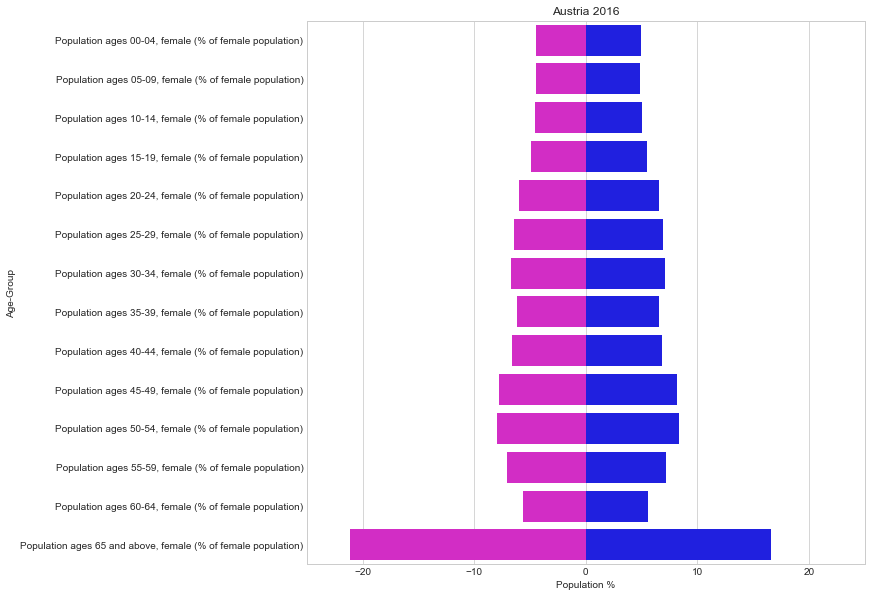

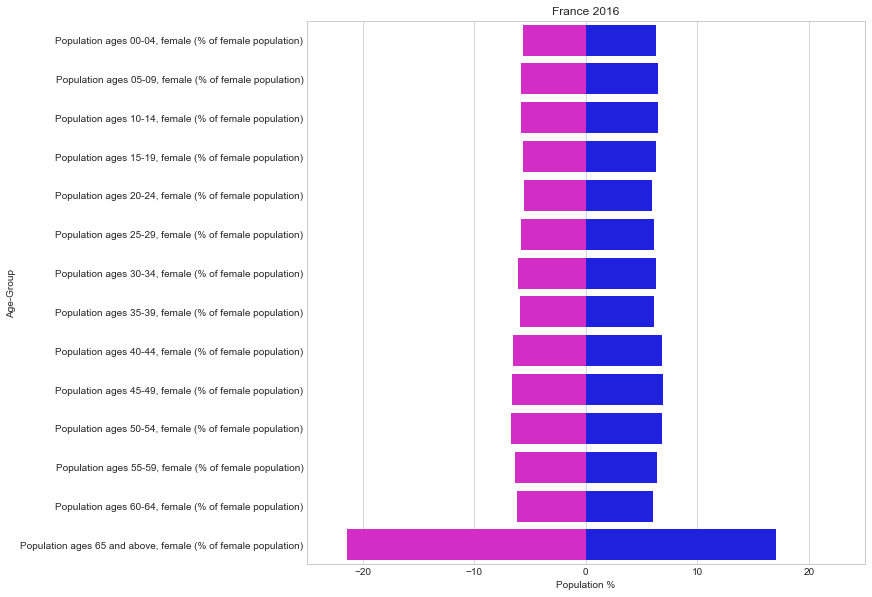

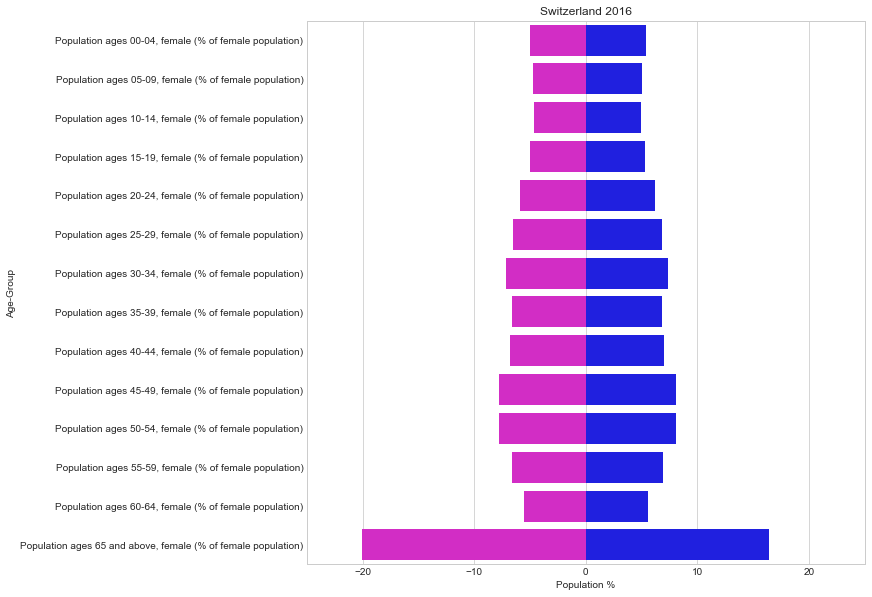

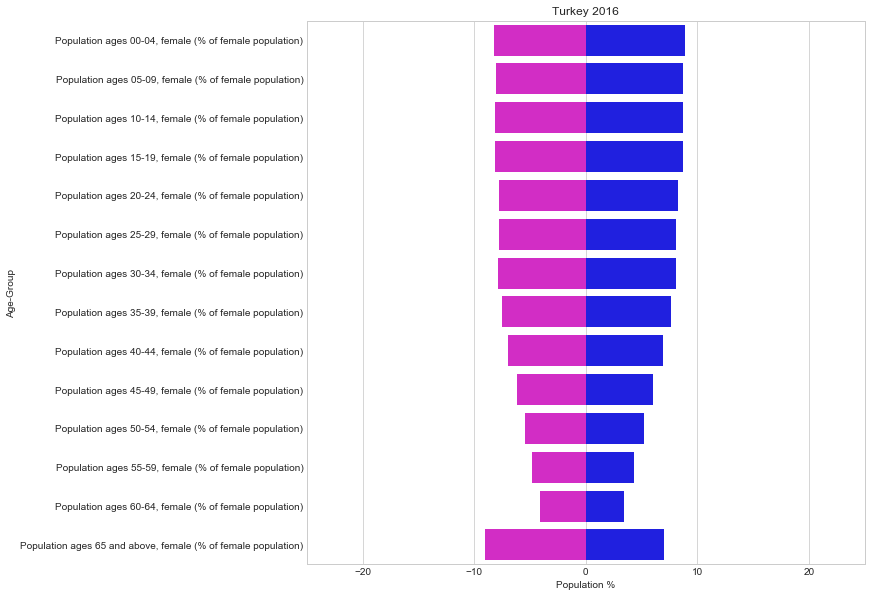

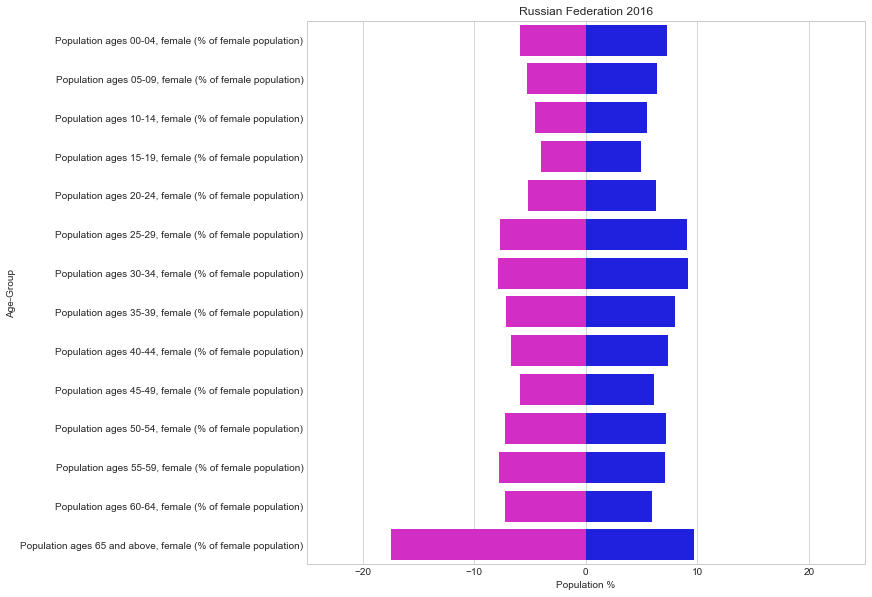

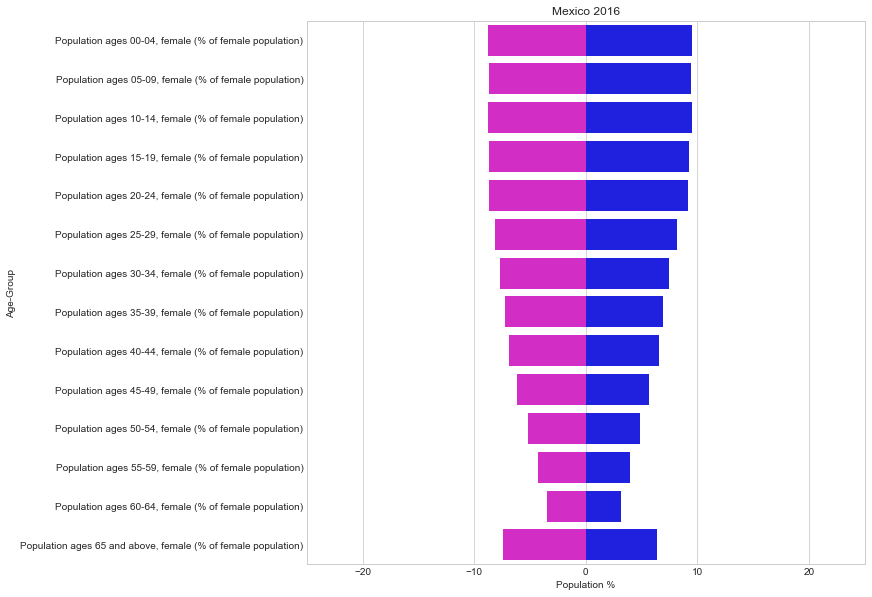

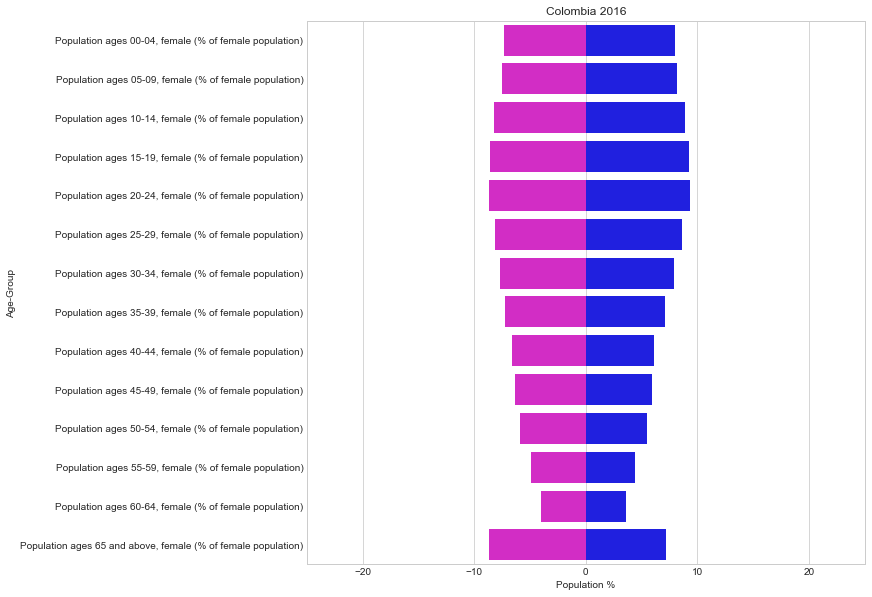

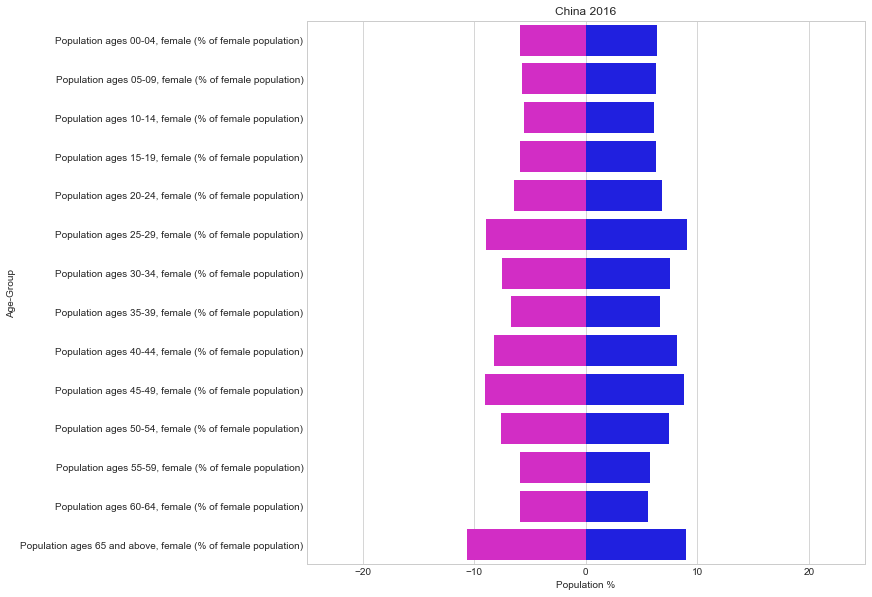

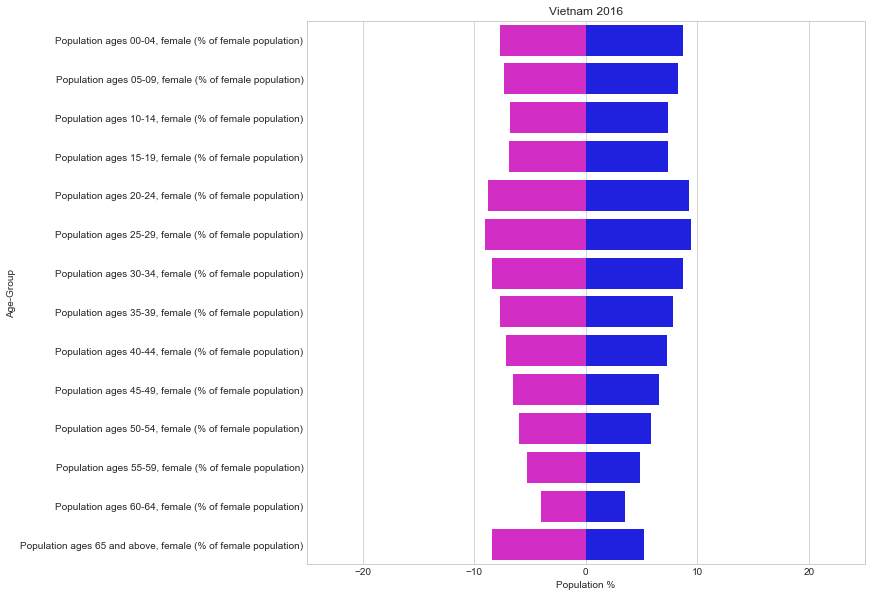

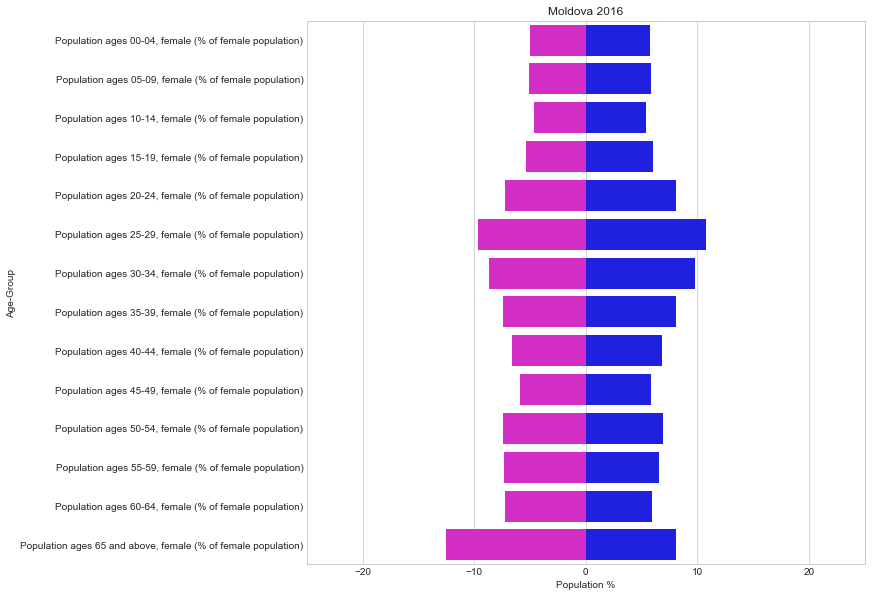

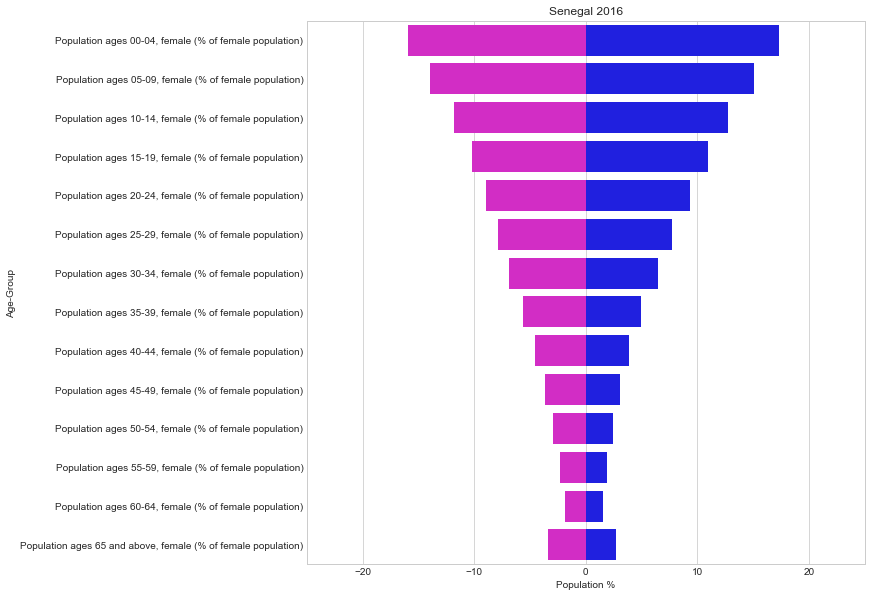

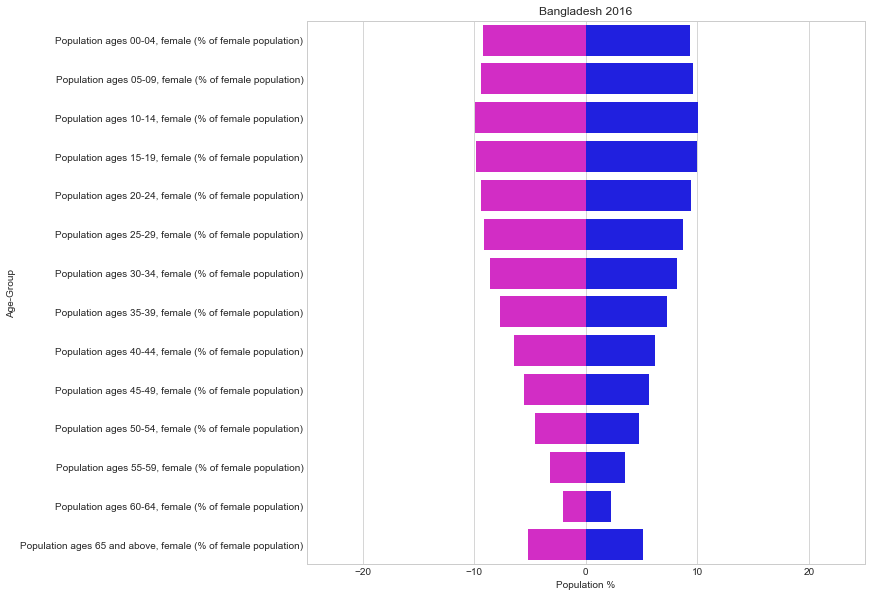

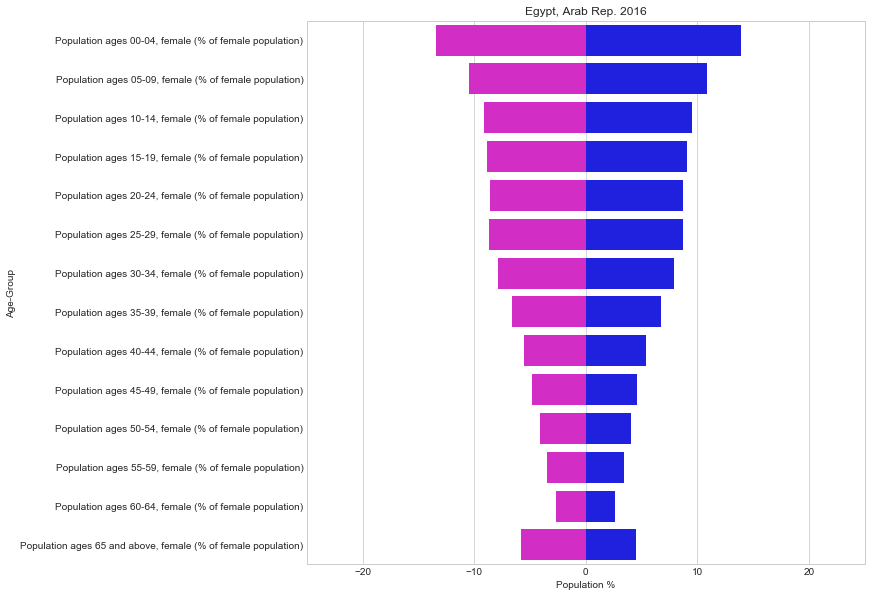

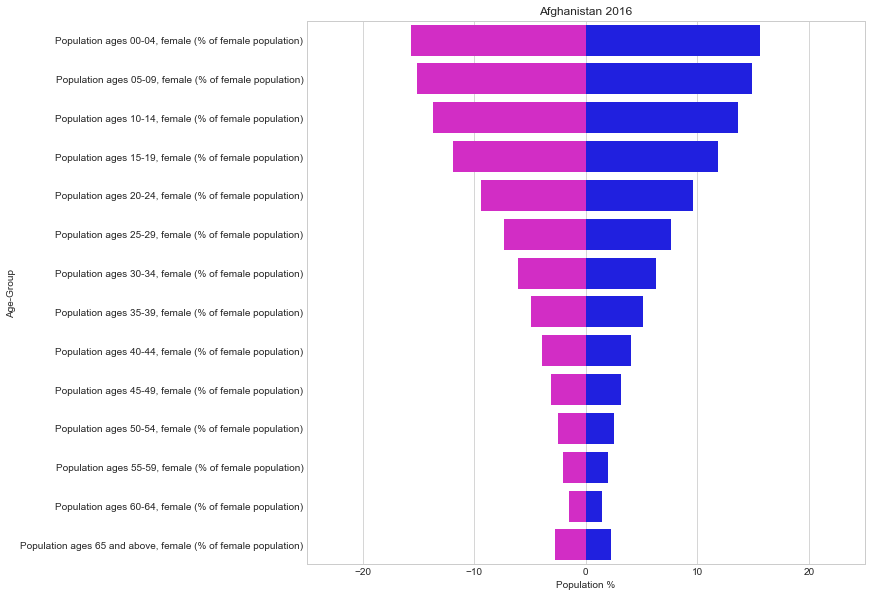

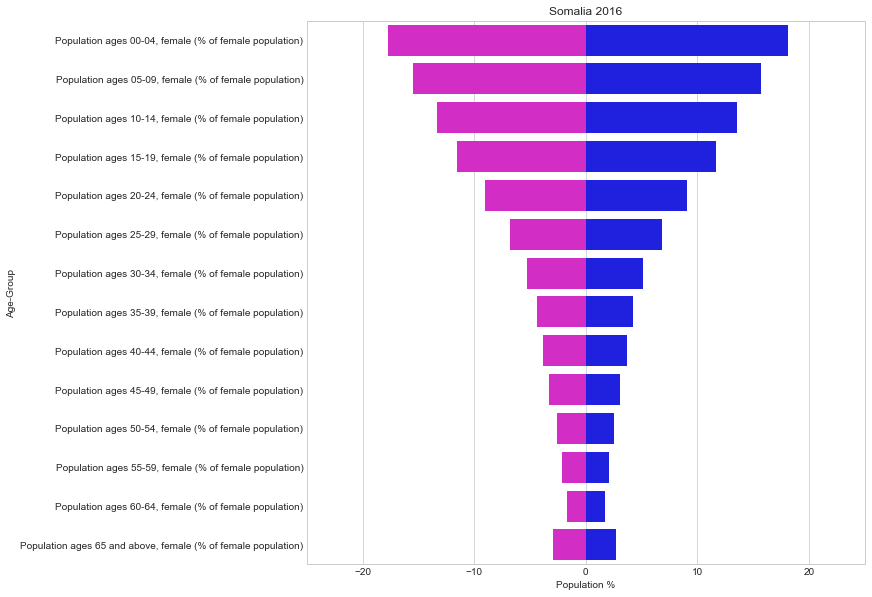

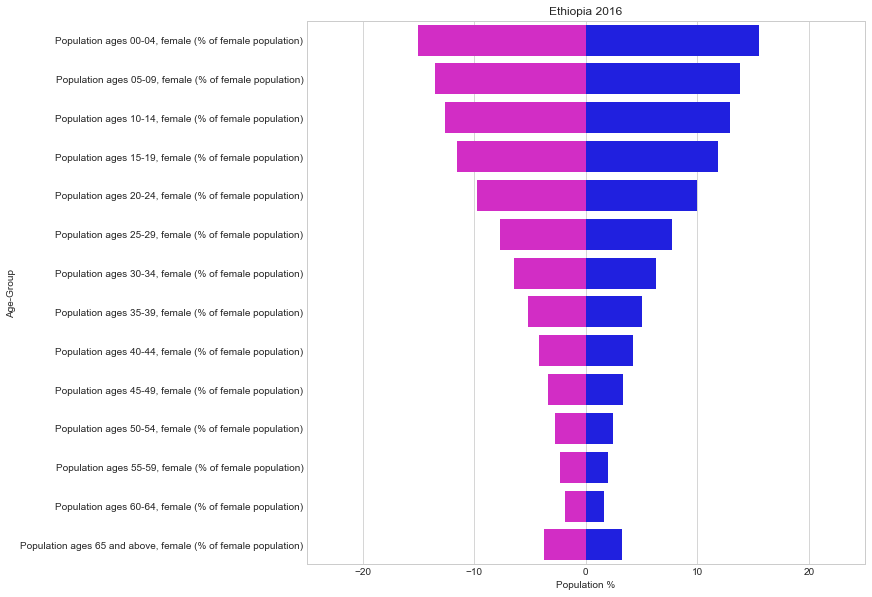

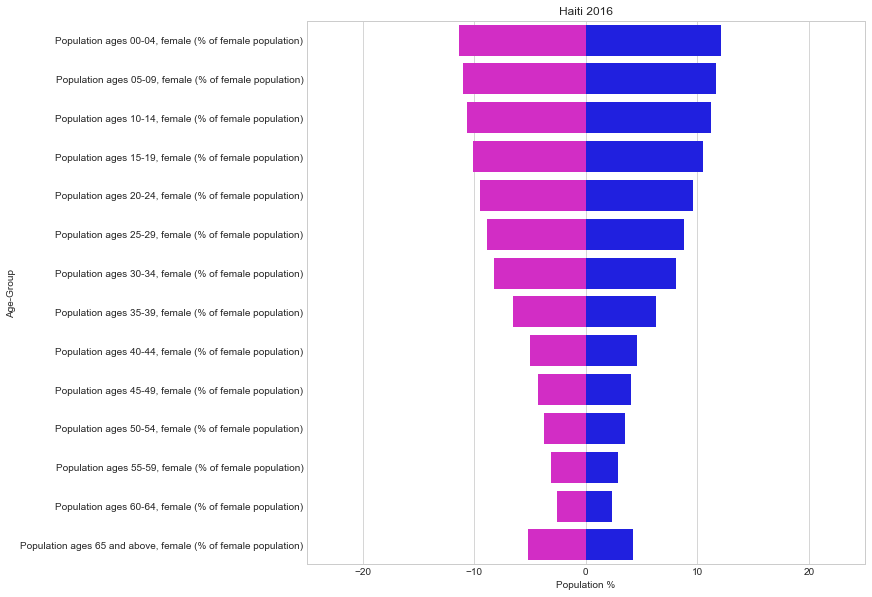

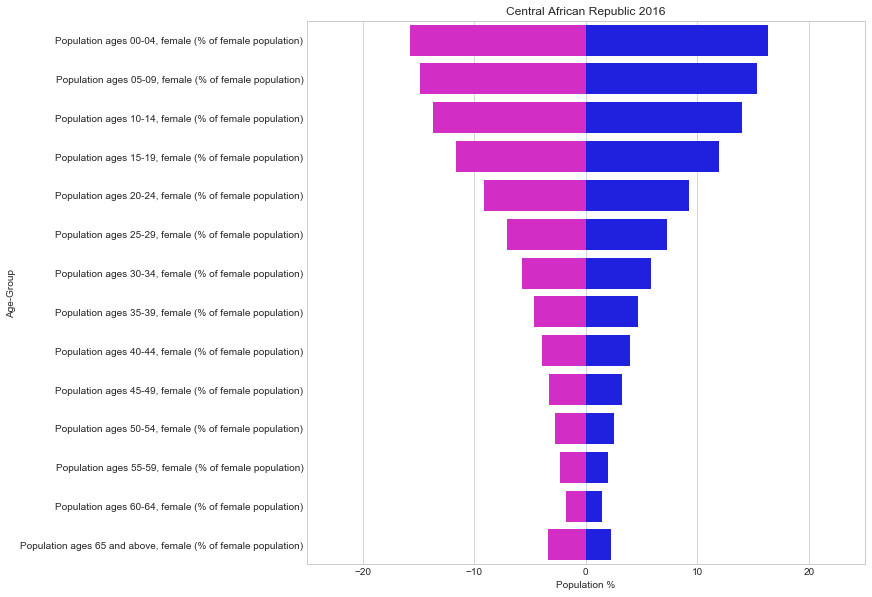

In [27]:
#https://github.com/afolaborn/Python_Jupyter_Notebook/blob/master/Population-Pyramid/Population_Pyramid_Final.ipynb
#https://matplotlib.org/2.0.2/api/colors_api.html#matplotlib.colors.Colormap

plt.style.use('seaborn-whitegrid')
sns.set_color_codes("pastel")

for country in range(len(countries)):
    plt.figure(figsize=(10,10))
    plt.xlim(-25,25)
    bar_plot = sns.barplot(x = [age_demo[country][i] for i in range(int(len(age_demo[1])/2))],
                       y = [age_demo[country].index[i] for i in range(int(len(age_demo[1])/2))],
                       color='Blue')

    bar_plot = sns.barplot(x = [age_demo[country][i+14] for i in range(int(len(age_demo[1])/2))],
                       y = [age_demo[country].index[i+14] for i in range(int(len(age_demo[1])/2))],
                       color='#ee11dc')
    bar_plot.set(xlabel="Population %", ylabel="Age-Group", title = countries[country] + ' 2016');
    plt.savefig(chc_list[country] + '_population_pyramid.pdf', bbox_inches='tight')
    ;





## 4.2 Smoking in Different Income Levels
Let's first extract the smoking information from the main dataframe. Then, we will proceed to plot them with loops.

In [28]:
#create different frames
upper_smoke = [None] * len(upper)
for i in range(len(upper_smoke)):
    upper_smoke[i] = new_df.loc[upper[i]][smoking]
    
upmid_smoke = [None] * len(midupper)
for i in range(len(upmid_smoke)):
    upmid_smoke[i] = new_df.loc[midupper[i]][smoking]
    
lomid_smoke = [None] * len(midlower)
for i in range(len(lomid_smoke)):
    lomid_smoke[i] = new_df.loc[midlower[i]][smoking]
    
lower_smoke = [None] * len(lower)
for i in range(len(lower_smoke)):
    lower_smoke[i] = new_df.loc[lower[i]][smoking]

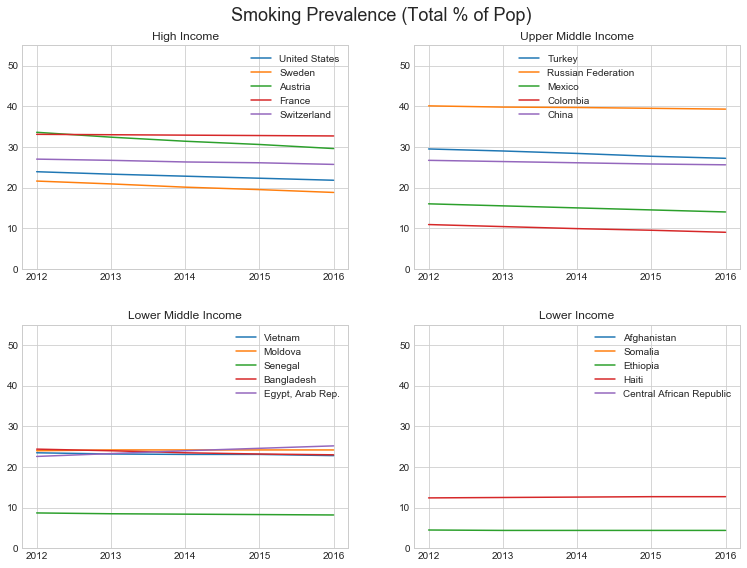

In [29]:
#Plotting
plt.figure(figsize=(10,7)) 
plt.suptitle('Smoking Prevalence (Total % of Pop)', x=0.5, y=1.075, fontsize=18)
plt.subplot(2, 2, 1) #high income smoking
for i in range(len(upper_smoke)):
    plt.plot(smoking[0], data = upper_smoke[i], label=upper[i])
    plt.legend(loc=0)
plt.ylim(0,55)
plt.title("High Income")
plt.subplot(2, 2, 2) # upper middle income smoking
for i in range(len(upmid_smoke)):
    plt.plot(smoking[0], data = upmid_smoke[i], label=midupper[i])
    plt.legend(loc=0)
plt.ylim(0,55)
plt.title("Upper Middle Income")
plt.subplot(2, 2, 3) #lower middle income smoking
for i in range(len(lomid_smoke)):
    plt.plot(smoking[0], data = lomid_smoke[i], label=midlower[i])
    plt.legend(loc=0)
plt.ylim(0,55)
plt.title("Lower Middle Income")
plt.subplot(2, 2, 4) #lower income smoking
for i in range(len(lower_smoke)):
    plt.plot(smoking[0], data = lower_smoke[i], label=lower[i])
    plt.legend(loc=0)
plt.ylim(0,55)
plt.title("Lower Income")

plt.subplots_adjust(top=0.999, bottom=0.001, left=.001, right=0.999, hspace=0.25,
                    wspace=0.2)

plt.savefig('Smoking_4_income_levels.pdf', bbox_inches='tight'), 
#plt.savefig('Smoking_4_income_levels.png', bbox_inches='tight'), 
plt.show();

## 4.3 Alcohol Consumption in Different Income Levels
Now let's extract the alcohol consumption from the main dataframe. Then, we will proceed to plot them with loops again.

In [30]:
#create different frames
upper_alc = [None] * len(upper)
for i in range(len(upper_alc)):
    upper_alc[i] = new_df.loc[upper[i]][alcohol]
    
upmid_alc = [None] * len(midupper)
for i in range(len(upmid_alc)):
    upmid_alc[i] = new_df.loc[midupper[i]][alcohol]
    
lomid_alc = [None] * len(midlower)
for i in range(len(lomid_alc)):
    lomid_alc[i] = new_df.loc[midlower[i]][alcohol]
    
lower_alc = [None] * len(lower)
for i in range(len(lower_alc)):
    lower_alc[i] = new_df.loc[lower[i]][alcohol]

#lower_alc[0].loc['2016'][0], lower_alc[0].loc['2016'][2]
#lower_alc[0].loc['2016']
#lower[1]

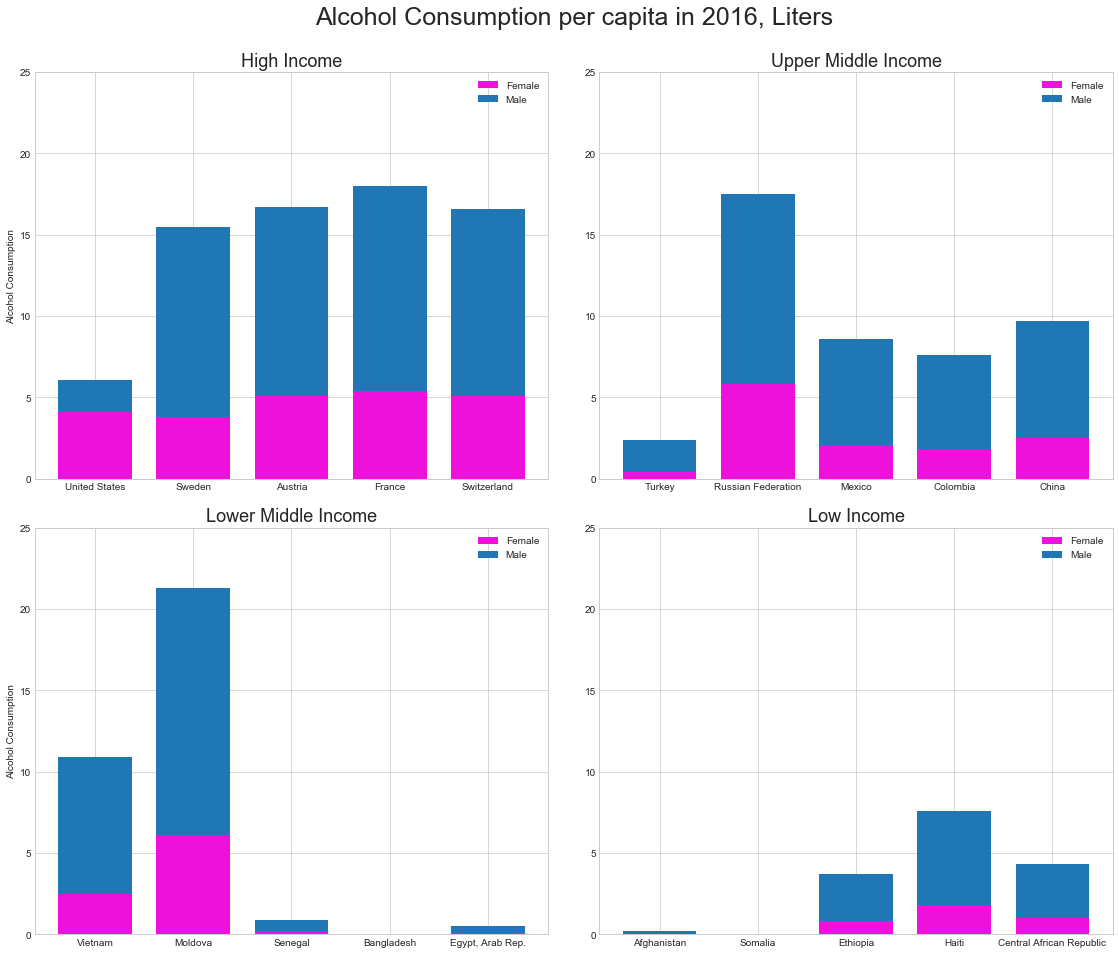

In [31]:
#Plotting
N = 5
ind = np.arange(N)    # the x locations for the groups
width = 0.75  #width between the bars

uppFemaleAlc = (upper_alc[0].loc['2016'][0], upper_alc[1].loc['2016'][0], \
            upper_alc[2].loc['2016'][0], upper_alc[3].loc['2016'][0], upper_alc[4].loc['2016'][0])
uppMaleAlc = (upmid_alc[0].loc['2016'][1], upmid_alc[1].loc['2016'][1], \
            upper_alc[2].loc['2016'][1], upper_alc[3].loc['2016'][1], upper_alc[4].loc['2016'][1])

uppMidFemaleAlc = (upmid_alc[0].loc['2016'][0], upmid_alc[1].loc['2016'][0], \
            upmid_alc[2].loc['2016'][0], upmid_alc[3].loc['2016'][0], upmid_alc[4].loc['2016'][0])
uppMidMaleAlc = (upmid_alc[0].loc['2016'][1], upmid_alc[1].loc['2016'][1], \
            upmid_alc[2].loc['2016'][1], upmid_alc[3].loc['2016'][1], upmid_alc[4].loc['2016'][1])

lowMidFemaleAlc = (lomid_alc[0].loc['2016'][0], lomid_alc[1].loc['2016'][0], \
            lomid_alc[2].loc['2016'][0], lomid_alc[3].loc['2016'][0], lomid_alc[4].loc['2016'][0])
lowMidMaleAlc = (lomid_alc[0].loc['2016'][1], lomid_alc[1].loc['2016'][1], \
            lomid_alc[2].loc['2016'][1], lomid_alc[3].loc['2016'][1], lomid_alc[4].loc['2016'][1])

lowFemaleAlc = (lower_alc[0].loc['2016'][0], lower_alc[1].loc['2016'][0], \
            lower_alc[2].loc['2016'][0], lower_alc[3].loc['2016'][0], lower_alc[4].loc['2016'][0])
lowMaleAlc = (lower_alc[0].loc['2016'][1], lower_alc[1].loc['2016'][1], \
            lower_alc[2].loc['2016'][1], lower_alc[3].loc['2016'][1], lower_alc[4].loc['2016'][1])

plt.figure(figsize=(15,12)) 
plt.suptitle('Alcohol Consumption per capita in 2016, Liters', x=0.5, y=1.075, fontsize=25)

plt.subplot(2, 2, 1) #high income cons
p1 = plt.bar(ind, uppFemaleAlc, width, color='#ee11dc')
p2 = plt.bar(ind, uppMaleAlc, width, bottom=uppFemaleAlc)
plt.xticks(ind, (upper))
plt.ylabel('Alcohol Consumption')
plt.ylim(0,25)
plt.title("High Income", fontsize=18)
plt.legend((p1, p2), ('Female', 'Male'))

plt.subplot(2, 2, 2) # upper middle cons
p1 = plt.bar(ind, uppMidFemaleAlc, width, color='#ee11dc')
p2 = plt.bar(ind, uppMidMaleAlc, width, bottom=uppMidFemaleAlc)
plt.title("Upper Middle Income", fontsize=18)
plt.xticks(ind, (midupper))
plt.ylim(0,25)
plt.legend((p1, p2), ('Female', 'Male'))

plt.subplot(2, 2, 3) #lower middle income smoking
p1 = plt.bar(ind, lowMidFemaleAlc, width, color='#ee11dc')
p2 = plt.bar(ind, lowMidMaleAlc, width, bottom=lowMidFemaleAlc)
plt.title('Alcohol Consumption by Gender')
plt.xticks(ind, (midlower))
plt.ylabel('Alcohol Consumption')
plt.title("Lower Middle Income", fontsize=18)
plt.ylim(0,25)
plt.legend((p1, p2), ('Female', 'Male'))

plt.subplot(2, 2, 4) #lower income smoking
p1 = plt.bar(ind, lowFemaleAlc, width, color='#ee11dc')
p2 = plt.bar(ind, lowMaleAlc, width, bottom=lowFemaleAlc)
plt.title("Low Income", fontsize=18)
plt.xticks(ind, (lower))
plt.ylim(0,25)
plt.legend((p1, p2), ('Female', 'Male'))

plt.subplots_adjust(top=0.999, bottom=0.001, left=.001, right=0.999, hspace=0.12,
                    wspace=0.1)

plt.savefig('Alcohol_Consumption_4_income_levels.pdf', bbox_inches='tight'), 
#plt.savefig('Alcohol_Consumption_4_income_levels.png', bbox_inches='tight'), 
plt.show();

## 4.4 Child Mortalities

In [32]:
all_poverty = [None] * len(countries)
#get population, population growth, GINI
for i in range(len(all_poverty)):
    all_poverty[i] = new_df.loc[countries[i]][[poverty_quantile[0], poverty_quantile[1], poverty_quantile[2], \
                                              poverty_quantile[3], poverty_quantile[4], poverty_lines[0], \
                                              poverty_lines[1], poverty_lines[2]]]
    
all_poverty[1].loc['2015'].index[5];

In [33]:
poverty_dist = [None] * len(countries)
for country in range(len(countries)):
     poverty_dist[country] = ([all_poverty[country].loc['2015'][5], all_poverty[country].loc['2015'][6], all_poverty[country].loc['2015'][7]])

In [34]:
child_mortalities = [None] * len(countries)
for country in range(len(countries)):
    child_mortalities[country] = new_df.loc[countries[country]][child]
child_mortalities[17].columns

Index(['Mortality rate, under-5, female (per 1,000 live births)',
       'Mortality rate, under-5, male (per 1,000 live births)',
       'Births attended by skilled health staff (% of total)',
       'Out-of-pocket expenditure (% of current health expenditure)',
       'Mortality rate, infant (per 1,000 live births)'],
      dtype='object')

In [35]:
health_exp_pocket = child_mortalities[17].columns[3]
mortality_rate = child_mortalities[17].columns[4]
skilled_staff = child_mortalities[17].columns[2] #2014 has the most data for skilled staff percentage


In [36]:
x = [child_mortalities[i][mortality_rate].loc['2015'] for i in range(len(countries))]
x2 = [child_mortalities[i][mortality_rate].loc['2014'] for i in range(len(countries))]
y1 = [child_mortalities[i][health_exp_pocket].loc['2015'] for i in range(len(countries))]
y2 = [poverty_dist[i][0] for i in range(len(countries))]
y3 = [poverty_dist[i][1] for i in range(len(countries))]
y4 = [poverty_dist[i][2] for i in range(len(countries))]
y5 = [child_mortalities[i][skilled_staff].loc['2014'] for i in range(len(countries))]

### 4.4.1 Child Mortality vs Poverty Line

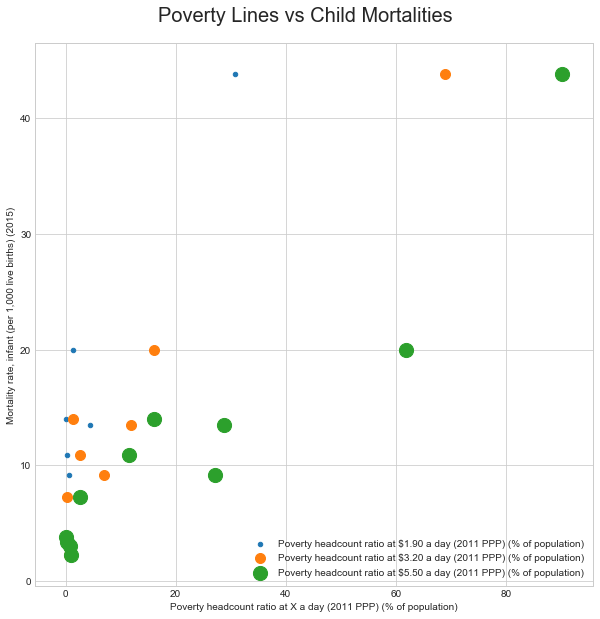

In [37]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

#ax1.scatter(x = x, y = y1)
ax1.scatter(x = y2, y = x, s=20)
ax1.scatter(x = y3, y = x, s=100)
ax1.scatter(x = y4, y = x, s=200)
plt.ylabel(str(child_mortalities[17].columns[4]) + ' (2015)')
plt.xlabel('Poverty headcount ratio at X a day (2011 PPP) (% of population)')

plt.legend([all_poverty[1].loc['2015'].index[5], all_poverty[1].loc['2015'].index[6], all_poverty[1].loc['2015'].index[7]],loc=0)
plt.suptitle('Poverty Lines vs Child Mortalities', fontsize=20, y=0.93)

plt.savefig('cm_vs_pl.pdf', bbox_inches='tight'), 
#plt.savefig('cm_vs_pl.png', bbox_inches='tight'), 
plt.show();

### 4.4.2 Child Mortality vs Health Expenditure

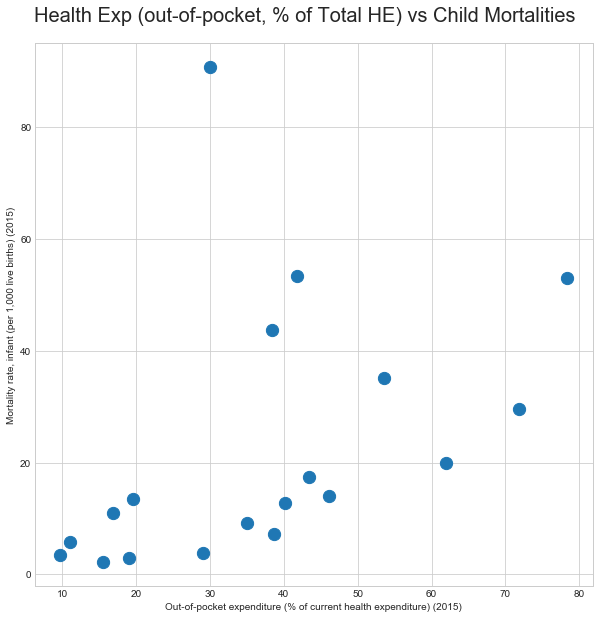

In [38]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x = y1, y = x, s=150)
plt.ylabel(str(child_mortalities[17].columns[4]) + ' (2015)')
plt.xlabel(str(child_mortalities[17].columns[3]) + ' (2015)')

#plt.legend([child_mortalities[17].columns[3]], loc=0)
plt.suptitle('Health Exp (out-of-pocket, % of Total HE) vs Child Mortalities', fontsize=20, y=0.93)
plt.savefig('cm_vs_he.pdf', bbox_inches='tight'), 
#plt.savefig('cm_vs_he.png', bbox_inches='tight'), 
plt.show();

### 4.4.3 Child Mortality vs Skilled Staff (%)

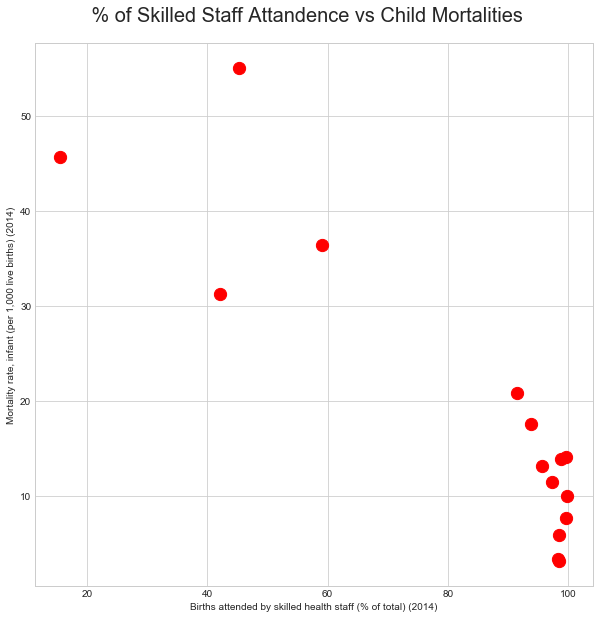

In [39]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x = y5, y = x2, s=150, color='Red')
plt.ylabel(str(child_mortalities[17].columns[4]) + ' (2014)')
plt.xlabel(str(child_mortalities[17].columns[2]) + ' (2014)')

#plt.legend([child_mortalities[17].columns[3]], loc=0)
plt.suptitle(' % of Skilled Staff Attandence vs Child Mortalities', fontsize=20, y=0.93)
plt.savefig('cm_vs_skil.pdf', bbox_inches='tight'), 
#plt.savefig('cm_vs_skil.png', bbox_inches='tight'), 
plt.show();

## 4.5 Poverty

### 4.5.1 GINI Index
Let's look at GINI for some of the most unequal countries in terms of income distribution

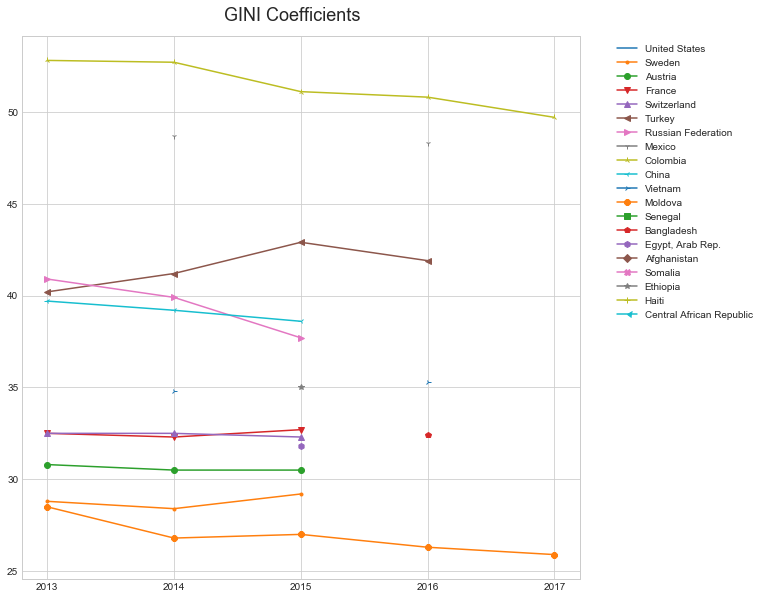

In [40]:
plt.figure(figsize=(10,10)) 
for i in range(len(countries)):
    plt.plot(gini[0], data = all_general[i], label=countries[i], marker=markers[i])
plt.legend(bbox_to_anchor=(1.05, 1.0),loc=0)
plt.suptitle("GINI Coefficients", fontsize=18, x=0.5, y=0.92)
#plt.ylim(0)

plt.savefig('gini_all.pdf', bbox_inches='tight'),
#plt.savefig('gini_all.png', bbox_inches='tight')
plt.show();

### 4.5.2 Income Distribution of Unequal Countries

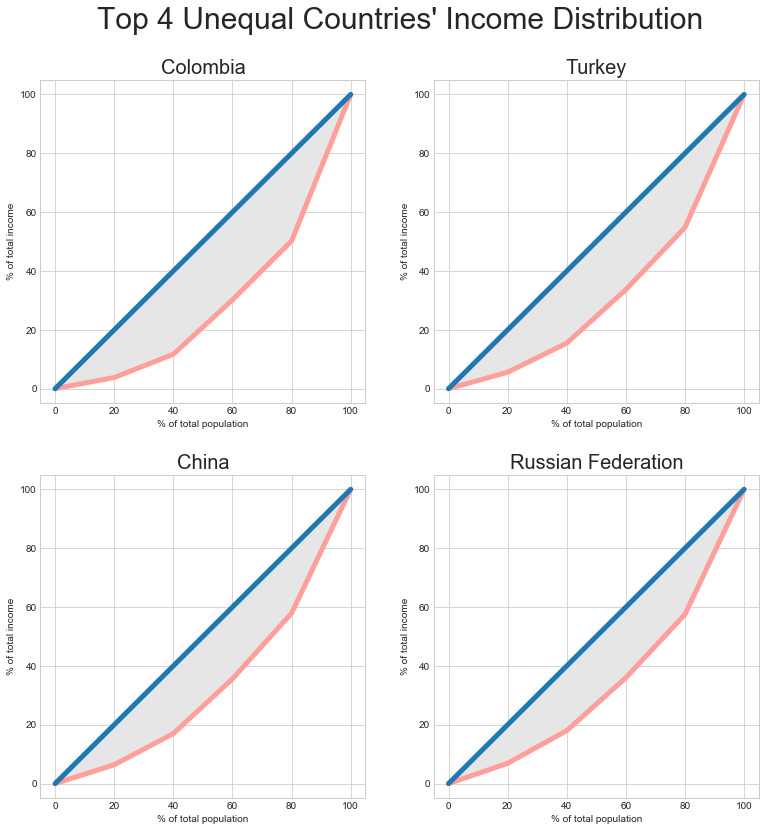

In [41]:
#https://kite.com/python/docs/matplotlib.pyplot.fill_between

plt.figure(figsize=(10,10))          

cumulative_poverty = [None] * len(countries)
for country in range(len(countries)):
    
    cumulative_poverty[country] = [0, all_poverty[country].loc['2015'][0], \
                     all_poverty[country].loc['2015'][1] + all_poverty[country].loc['2015'][0], \
                     all_poverty[country].loc['2015'][2] + all_poverty[1].loc['2015'][1] + all_poverty[country].loc['2015'][0], \
                     all_poverty[country].loc['2015'][3] + all_poverty[country].loc['2015'][2] + all_poverty[1].loc['2015'][1] + all_poverty[country].loc['2015'][0], \
                     100]
    
width = 0.5      # the width of the bars
ind = ['0', '20', '40', '60' ,'80', '100']

plt.suptitle("Top 4 Unequal Countries' Income Distribution",x=0.5, y=1.1,fontsize=30)
plt.subplot(2,2,1)
plt.plot(ind, cumulative_poverty[8], width, color='r',linewidth=5)
plt.plot([0, 5], [0, 100],linewidth=5)
plt.fill_between([0,1,2,3,4,5], [0,20,40,60,80,100], cumulative_poverty[8],color="0.9")
plt.title(countries[8], fontsize=20)
plt.ylabel("% of total income")  
plt.xlabel("% of total population")

plt.subplot(2,2,2)
plt.plot(ind, cumulative_poverty[5], width, color='r',linewidth=5)
plt.plot([0, 5], [0, 100],linewidth=5)
plt.fill_between([0,1,2,3,4,5], [0,20,40,60,80,100], cumulative_poverty[5],color="0.9")
plt.title(countries[5], fontsize=20)
plt.ylabel("% of total income")  
plt.xlabel("% of total population")

plt.subplot(2,2,3)
plt.plot(ind, cumulative_poverty[9], width, color='r',linewidth=5)
plt.plot([0, 5], [0, 100],linewidth=5)
plt.fill_between([0,1,2,3,4,5], [0,20,40,60,80,100], cumulative_poverty[9],color="0.9")
plt.title(countries[9], fontsize=20)
plt.ylabel("% of total income")  
plt.xlabel("% of total population")


plt.subplot(2,2,4)
plt.plot(ind, cumulative_poverty[6], width, color='r',linewidth=5)
plt.plot([0, 5], [0, 100],linewidth=5)
plt.fill_between([0,1,2,3,4,5], [0,20,40,60,80,100], cumulative_poverty[6],color="0.9")
plt.title(countries[6], fontsize=20)
plt.ylabel("% of total income")  
plt.xlabel("% of total population")

plt.subplots_adjust(top=0.999, bottom=0.001, left=.001, right=0.999, hspace=0.22, wspace=0.21)

plt.savefig('unequal_income_dist.pdf', bbox_inches='tight'),
#plt.savefig('unequal_income_dist.png', bbox_inches='tight'),
plt.show()

### 4.5.3 Income Distribution of "Equal'' Countries

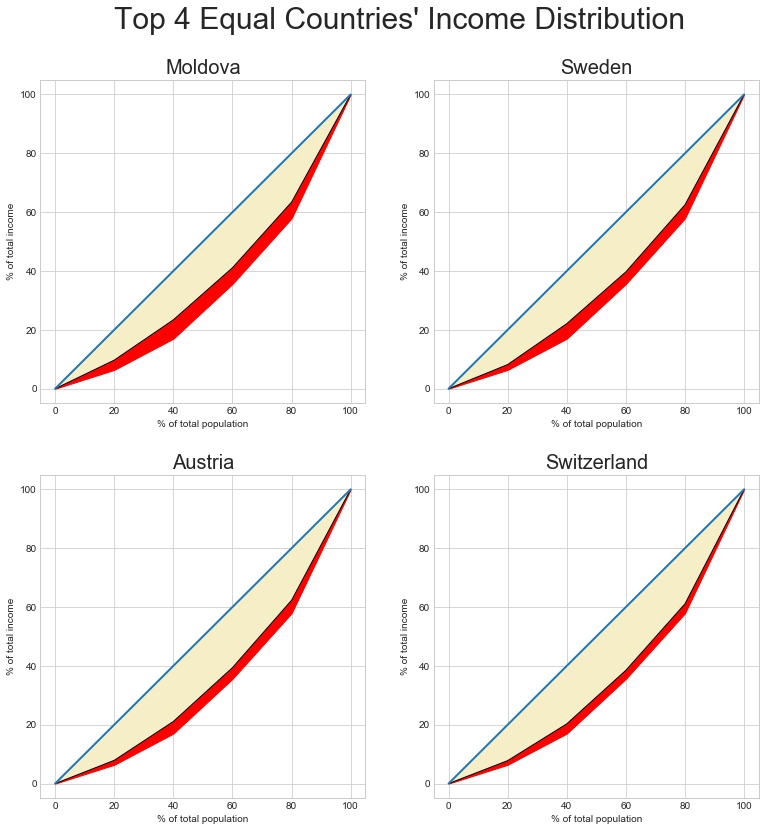

In [42]:
plt.figure(figsize=(10,10))   

plt.suptitle("Top 4 Equal Countries' Income Distribution", x=0.5, y=1.1,fontsize=30)


plt.subplot(2,2,1)
plt.plot(ind, cumulative_poverty[11], width, color='Black',linewidth=1)
plt.plot([0, 5], [0, 100],linewidth=2)
plt.fill_between([0,1,2,3,4,5], [0,20,40,60,80,100], cumulative_poverty[11],color="#f5eec6")
plt.fill_between([0,1,2,3,4,5], cumulative_poverty[11], cumulative_poverty[9],  color="Red")
plt.title(countries[11], fontsize=20)
plt.ylabel("% of total income")  
plt.xlabel("% of total population")

plt.subplot(2,2,2)
plt.plot(ind, cumulative_poverty[1], width, color='Black',linewidth=1)
plt.plot([0, 5], [0, 100],linewidth=2)
plt.fill_between([0,1,2,3,4,5], [0,20,40,60,80,100], cumulative_poverty[1],color="#f5eec6")
plt.fill_between([0,1,2,3,4,5], cumulative_poverty[1], cumulative_poverty[9],  color="Red")
plt.title(countries[1], fontsize=20)
plt.ylabel("% of total income")  
plt.xlabel("% of total population")

plt.subplot(2,2,3)
plt.plot(ind, cumulative_poverty[2], width, color='Black',linewidth=1)
plt.plot([0, 5], [0, 100],linewidth=2)
plt.fill_between([0,1,2,3,4,5], [0,20,40,60,80,100], cumulative_poverty[2],color="#f5eec6")
plt.fill_between([0,1,2,3,4,5], cumulative_poverty[2], cumulative_poverty[9],  color="Red")
plt.title(countries[2], fontsize=20)
plt.ylabel("% of total income")  
plt.xlabel("% of total population")

plt.subplot(2,2,4)
plt.plot(ind, cumulative_poverty[4], width, color='Black',linewidth=1)
plt.plot([0, 5], [0, 100],linewidth=2)
plt.fill_between([0,1,2,3,4,5], [0,20,40,60,80,100], cumulative_poverty[4],color="#f5eec6")
plt.fill_between([0,1,2,3,4,5], cumulative_poverty[4], cumulative_poverty[9],  color="Red")
plt.title(countries[4], fontsize=20)
plt.ylabel("% of total income")  
plt.xlabel("% of total population")



plt.subplots_adjust(top=0.999, bottom=0.001, left=.001, right=0.999, hspace=0.22, wspace=0.21)

plt.savefig('equal_income_dist.pdf', bbox_inches='tight'),
#plt.savefig('equal_income_dist.png', bbox_inches='tight'),
plt.show()

### 4.5.3 Poverty Lines in Unequal vs Low Income Countries

#### 4.5.3.1 Below \$1.90

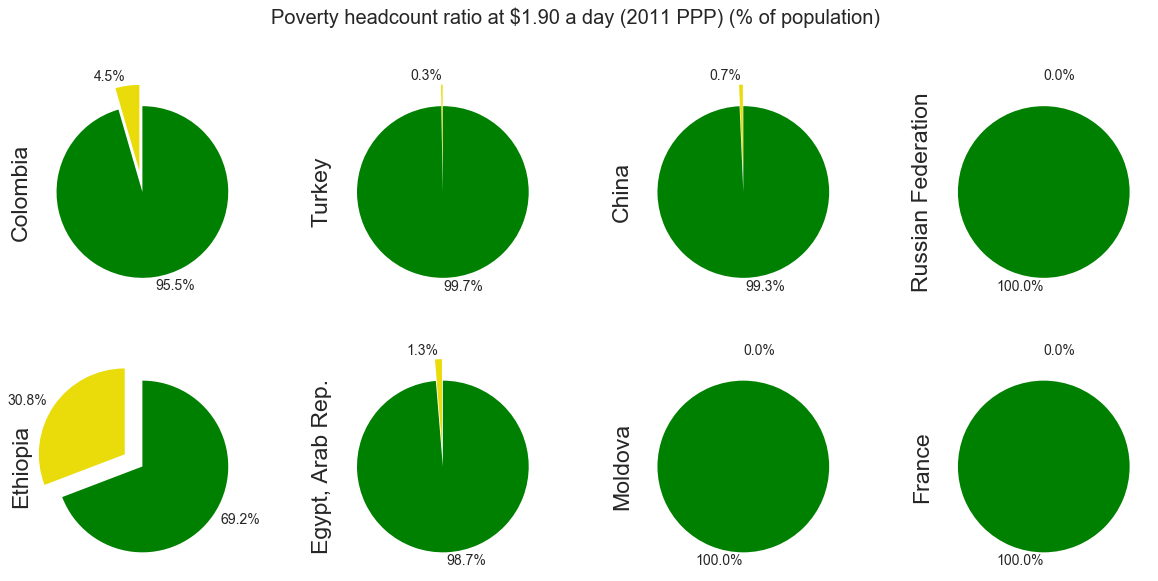

In [43]:
#https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python

labels2 = [countries[8], countries[5], countries[9], countries[6], countries[17], countries[14], countries[11], countries[3]]
basize_1 = [poverty_dist[8][0], 100 - poverty_dist[8][0]]
basize_2 = [poverty_dist[5][0], 100 - poverty_dist[5][0]]
basize_3 = [poverty_dist[9][0], 100 - poverty_dist[9][0]]
basize_4 = [poverty_dist[6][0], 100 - poverty_dist[6][0]]
basize_5 = [poverty_dist[17][0], round(100 - poverty_dist[17][0],2)]
basize_6 = [poverty_dist[14][0], 100 - poverty_dist[14][0]]
basize_7 = [poverty_dist[11][0], 100 - poverty_dist[11][0]]
basize_8 = [poverty_dist[3][0], 100 - poverty_dist[3][0]]
colors0 = ['#eadb0b','Green']
explode_2 = (0.25, 0)
plt.figure(figsize=(20,10)) 
plt.suptitle(all_poverty[1].loc['2015'].index[5],x=0.5, y=0.95, fontsize=20)
plt.subplot(2,4,1)
plt.pie(basize_1, explode = explode_2, labels=[str(basize_1[0]) + '%', str(basize_1[1]) + '%'], \
        startangle = 90, colors=colors0, textprops={'fontsize': 14})
plt.ylabel(labels2[0], fontsize=23, x=0 ,y=0.5)  

plt.subplot(2,4,2)
plt.pie(basize_2, explode = explode_2, labels=[str(basize_2[0]) + '%', str(basize_2[1]) + '%'], \
        startangle = 90, colors=colors0, textprops={'fontsize': 14})
plt.ylabel(labels2[1], fontsize=23, x=0 ,y=0.5)    

plt.subplot(2,4,3)
plt.pie(basize_3, explode = explode_2, labels=[str(basize_3[0]) + '%', str(basize_3[1]) + '%'], \
        startangle = 90, colors=colors0, textprops={'fontsize': 14})
plt.ylabel(labels2[2], fontsize=23, x=0 ,y=0.5)     

plt.subplot(2,4,4)
plt.pie(basize_4, explode = explode_2, labels=[str(basize_4[0]) + '%', str(basize_4[1]) + '%'], \
        startangle = 90, colors=colors0, textprops={'fontsize': 14})
plt.ylabel(labels2[3], fontsize=23, x=0 ,y=0.5)  

plt.subplot(2,4,5)
plt.pie(basize_5, explode = explode_2, labels=[str(basize_5[0]) + '%', str(basize_5[1]) + '%'], \
        startangle = 90, colors=colors0, textprops={'fontsize': 14})
plt.ylabel(labels2[4], fontsize=23, x=-1 ,y=0.5) 

plt.subplot(2,4,6)
plt.pie(basize_6, explode = explode_2, labels=[str(basize_6[0]) + '%', str(basize_6[1]) + '%'], \
        startangle = 90, colors=colors0, textprops={'fontsize': 14})
plt.ylabel(labels2[5], fontsize=23, x=-1 ,y=0.5)  

plt.subplot(2,4,7)
plt.pie(basize_7, explode = explode_2, labels=[str(basize_7[0]) + '%', str(basize_7[1]) + '%'], \
        startangle = 90, colors=colors0, textprops={'fontsize': 14})
plt.ylabel(labels2[6], fontsize=23, x=-1 ,y=0.5)  

plt.subplot(2,4,8)
plt.pie(basize_8, explode = explode_2, labels=[str(basize_8[0]) + '%', str(basize_8[1]) + '%'], \
        startangle = 90, colors=colors0, textprops={'fontsize': 14})
plt.ylabel(labels2[7], fontsize=23, x=-1 ,y=0.5)  

plt.subplots_adjust(hspace=0.02, wspace=0.4)

plt.savefig('below_190.pdf', bbox_inches='tight'), 
#plt.savefig('below_190.png', bbox_inches='tight'), 
plt.show()

#### 4.5.3.2 Below \$3.20

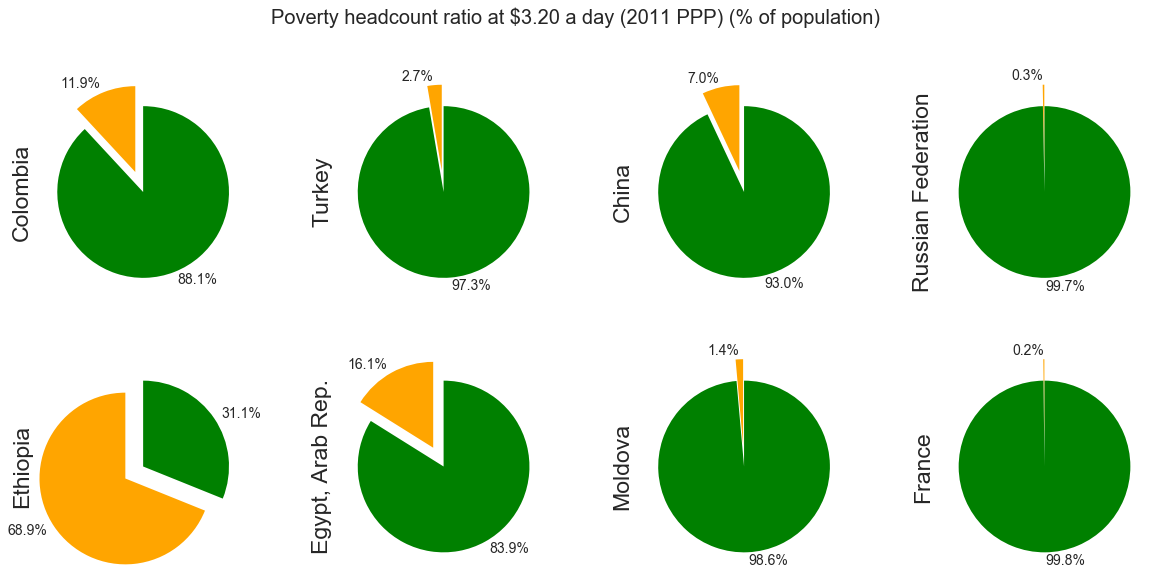

In [44]:

asize_1 = [poverty_dist[8][1], 100 - poverty_dist[8][1]]
asize_2 = [poverty_dist[5][1], 100 - poverty_dist[5][1]]
asize_3 = [poverty_dist[9][1], 100 - poverty_dist[9][1]]
asize_4 = [poverty_dist[6][1], 100 - poverty_dist[6][1]]
asize_5 = [poverty_dist[17][1], round(100 - poverty_dist[17][1],2)]
asize_6 = [poverty_dist[14][1], 100 - poverty_dist[14][1]]
asize_7 = [poverty_dist[11][1], 100 - poverty_dist[11][1]]
asize_8 = [poverty_dist[3][1], 100 - poverty_dist[3][1]]
colors1 = ['Orange','Green']
explode_2 = (0.25, 0)
plt.figure(figsize=(20,10)) 
plt.suptitle(all_poverty[1].loc['2015'].index[6],x=0.5, y=0.95, fontsize=20)
plt.subplot(2,4,1)
plt.pie(asize_1, explode = explode_2, labels=[str(asize_1[0]) + '%', str(asize_1[1]) + '%'], \
        startangle = 90, colors=colors1, textprops={'fontsize': 14})
plt.ylabel(labels2[0], fontsize=23, x=0 ,y=0.5)  

plt.subplot(2,4,2)
plt.pie(asize_2, explode = explode_2, labels=[str(asize_2[0]) + '%', str(asize_2[1]) + '%'], \
        startangle = 90, colors=colors1, textprops={'fontsize': 14})
plt.ylabel(labels2[1], fontsize=23, x=0 ,y=0.5)    

plt.subplot(2,4,3)
plt.pie(asize_3, explode = explode_2, labels=[str(asize_3[0]) + '%', str(asize_3[1]) + '%'], \
        startangle = 90, colors=colors1, textprops={'fontsize': 14})
plt.ylabel(labels2[2], fontsize=23, x=0 ,y=0.5)     

plt.subplot(2,4,4)
plt.pie(asize_4, explode = explode_2, labels=[str(asize_4[0]) + '%', str(asize_4[1]) + '%'], \
        startangle = 90, colors=colors1, textprops={'fontsize': 14})
plt.ylabel(labels2[3], fontsize=23, x=0 ,y=0.5)  

plt.subplot(2,4,5)
plt.pie(asize_5, explode = explode_2, labels=[str(asize_5[0]) + '%', str(asize_5[1]) + '%'], \
        startangle = 90, colors=colors1, textprops={'fontsize': 14})
plt.ylabel(labels2[4], fontsize=23, x=-1 ,y=0.5) 

plt.subplot(2,4,6)
plt.pie(asize_6, explode = explode_2, labels=[str(asize_6[0]) + '%', str(asize_6[1]) + '%'], \
        startangle = 90, colors=colors1, textprops={'fontsize': 14})
plt.ylabel(labels2[5], fontsize=23, x=-1 ,y=0.5)  

plt.subplot(2,4,7)
plt.pie(asize_7, explode = explode_2, labels=[str(asize_7[0]) + '%', str(asize_7[1]) + '%'], \
        startangle = 90, colors=colors1, textprops={'fontsize': 14})
plt.ylabel(labels2[6], fontsize=23, x=-1 ,y=0.5)  

plt.subplot(2,4,8)
plt.pie(asize_8, explode = explode_2, labels=[str(asize_8[0]) + '%', str(asize_8[1]) + '%'], \
        startangle = 90, colors=colors1, textprops={'fontsize': 14})
plt.ylabel(labels2[7], fontsize=23, x=-1 ,y=0.5)  

plt.subplots_adjust(hspace=0.02, wspace=0.4)

plt.savefig('below_320.pdf', bbox_inches='tight'), 
#plt.savefig('below_320.png', bbox_inches='tight'), 
plt.show()

#### 4.5.3.3 Below \$5.50

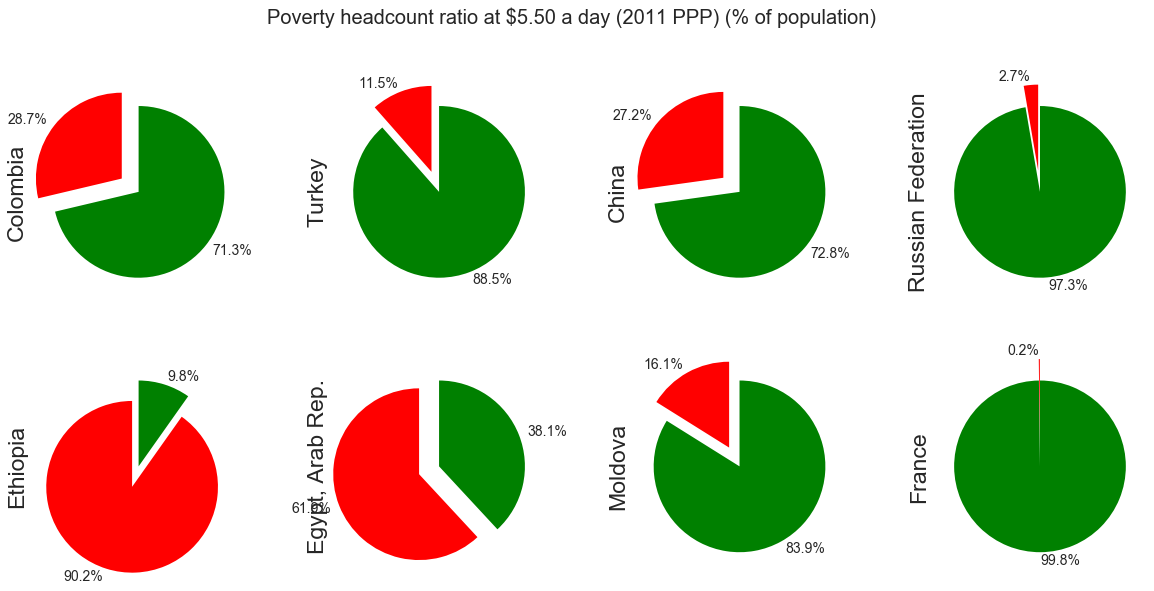

In [45]:

size_1 = [poverty_dist[8][2], 100 - poverty_dist[8][2]]
size_2 = [poverty_dist[5][2], 100 - poverty_dist[5][2]]
size_3 = [poverty_dist[9][2], 100 - poverty_dist[9][2]]
size_4 = [poverty_dist[6][2], 100 - poverty_dist[6][2]]
size_5 = [poverty_dist[17][2], round(100 - poverty_dist[17][2],2)]
size_6 = [poverty_dist[14][2], 100 - poverty_dist[14][2]]
size_7 = [poverty_dist[11][2], 100 - poverty_dist[11][2]]
size_8 = [poverty_dist[3][2], 100 - poverty_dist[3][2]]
colors2 = ['Red','Green']
plt.figure(figsize=(20,10)) 
plt.suptitle(all_poverty[1].loc['2015'].index[7],x=0.5, y=0.95, fontsize=20)
plt.subplot(2,4,1)
plt.pie(size_1, explode = explode_2, labels=[str(size_1[0]) + '%', str(size_1[1]) + '%'], \
        startangle = 90, colors=colors2, textprops={'fontsize': 14})
plt.ylabel(labels2[0], fontsize=23, x=0 ,y=0.5)  

plt.subplot(2,4,2)
plt.pie(size_2, explode = explode_2, labels=[str(size_2[0]) + '%', str(size_2[1]) + '%'], \
        startangle = 90, colors=colors2, textprops={'fontsize': 14})
plt.ylabel(labels2[1], fontsize=23, x=0 ,y=0.5)    

plt.subplot(2,4,3)
plt.pie(size_3, explode = explode_2, labels=[str(size_3[0]) + '%', str(size_3[1]) + '%'], \
        startangle = 90, colors=colors2, textprops={'fontsize': 14})
plt.ylabel(labels2[2], fontsize=23, x=0 ,y=0.5)     

plt.subplot(2,4,4)
plt.pie(size_4, explode = explode_2, labels=[str(size_4[0]) + '%', str(size_4[1]) + '%'], \
        startangle = 90, colors=colors2, textprops={'fontsize': 14})
plt.ylabel(labels2[3], fontsize=23, x=0 ,y=0.5)  

plt.subplot(2,4,5)
plt.pie(size_5, explode = explode_2, labels=[str(size_5[0]) + '%', str(size_5[1]) + '%'], \
        startangle = 90, colors=colors2, textprops={'fontsize': 14})
plt.ylabel(labels2[4], fontsize=23, x=-1 ,y=0.5) 

plt.subplot(2,4,6)
plt.pie(size_6, explode = explode_2, labels=[str(size_6[0]) + '%', str(size_6[1]) + '%'], \
        startangle = 90, colors=colors2, textprops={'fontsize': 14})
plt.ylabel(labels2[5], fontsize=23, x=-1 ,y=0.5)  

plt.subplot(2,4,7)
plt.pie(size_7, explode = explode_2, labels=[str(size_7[0]) + '%', str(size_7[1]) + '%'], \
        startangle = 90, colors=colors2, textprops={'fontsize': 14})
plt.ylabel(labels2[6], fontsize=23, x=-1 ,y=0.5)  

plt.subplot(2,4,8)
plt.pie(size_8, explode = explode_2, labels=[str(size_8[0]) + '%', str(size_8[1]) + '%'], \
        startangle = 90, colors=colors2, textprops={'fontsize': 14})
plt.ylabel(labels2[7], fontsize=23, x=-1 ,y=0.5)  

plt.subplots_adjust(hspace=0.02, wspace=0.4)

plt.savefig('below_550.pdf', bbox_inches='tight'), 
#plt.savefig('below_550.png', bbox_inches='tight'), 
plt.show()